In [1]:
#getting all imports in 
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
#difining the prossess for creating a plot, this funtion will be called in nearly every cell
def make_a_scatter(data, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    df = data.copy()
    #loops for defining variables 
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                ax.tick_params(axis='x', rotation=90)
                ax.tick_params('both', length=0, which='both')
                if save_fig:
                    
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [2]:
#doing more imports 
import pandas as pd
import pandas_datareader.data as web
import datetime
#funtion for getting data from FRED
def get_from_FRED(data_codes, start, 
                end = datetime.datetime.today(), freq = "M"):
    i = 0
    for key, val in data_codes.items():
        if i == 0:
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [3]:
#getting the data from freds and treating it like a modual 
from datlib.plots import * 
from datlib.FRED import *
#creating varrible for use in plots later 
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
#making table
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

data = get_from_FRED(data_codes = data_codes, start = start, end = end, freq = "M")

In [4]:
data.iloc[5:20]

Base: Total  Base: Currency in Circulation
DATE                                                  
2002-06-30    672959.50                      654.77375
2002-07-31    679419.40                      660.95980
2002-08-31    679483.75                      660.55800
2002-09-30    680743.75                      662.18875
2002-10-31    681441.00                      662.23800
2002-11-30    687687.50                      667.44375
2002-12-31    697517.00                      676.47200
2003-01-31    700446.80                      679.41140
2003-02-28    700362.25                      679.83225
2003-03-31    704898.00                      683.41300
2003-04-30    709173.00                      687.05540
2003-05-31    713596.00                      690.52125
2003-06-30    714323.50                      691.95350
2003-07-31    717764.80                      694.25700
2003-08-31    720466.50                      694.69650

In [5]:
#making funtion that will make tables for us 
def bil_to_mil(series):
    return series* 10**3

In [6]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               # breakdown of securities holdings
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               # other forms of lending
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
                "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               # Major share of deposits 
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               # Interest Rates
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
#stat dates in year, mounth, day               
start = datetime.datetime(2001, 5, 1)
#end day, witch is today
end = datetime.datetime.today()
#gets the data and clarifies varrables
data = get_from_FRED(data_codes = data_codes, start = start, 
                   end = end, freq = "M")
#difines varrible for use in table, we could just return all this but this will let us call this varrible later
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [7]:
data

Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2001-05-31             605900.0                              590873.40   
2001-06-30             609100.0                              594370.00   
2001-07-31             616000.0                              600386.75   
2001-08-31             622400.0                              606132.60   
2001-09-30             647200.0                              613558.25   
...                         ...                                    ...   
2021-06-30            6027000.0                             2178843.20   
2021-07-31            6130200.0                             2186117.50   
2021-08-31            6328700.0                             2187610.75   
2021-09-30            6388900.0                             2194881.00   
2021-10-31            6331000.0                             2202484.75   

            Balance Sheet: Total Assets ($ Mil)  \
DATE                                              
2001-05-31                                  NaN   
2001-06-30                                  NaN   
2001-07-31                                  NaN   
2001-08-31                                  NaN   
2001-09-30                                  NaN   
...                                         ...   
2021-06-30                           8026555.20   
2021-07-31                           8190356.75   
2021-08-31                           8291893.25   
2021-09-30                           8418612.40   
2021-10-31                           8516524.50   

            Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)  \
DATE                                                                        
2001-05-31                                                NaN               
2001-06-30                                                NaN               
2001-07-31                                                NaN               
2001-08-31                                                NaN               
2001-09-30                                                NaN               
...                                                       ...               
2021-06-30                                         7874851.20               
2021-07-31                                         8042917.00               
2021-08-31                                         8153497.75               
2021-09-30                                         8289740.40               
2021-10-31                                         8393472.00               

            Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2001-05-31                                              NaN   
2001-06-30                                              NaN   
2001-07-31                                              NaN   
2001-08-31                                              NaN   
2001-09-30                                              NaN   
...                                                     ...   
2021-06-30                                       7450341.40   
2021-07-31                                       7617340.75   
2021-08-31                                       7733453.75   
2021-09-30                                       7881596.20   
2021-10-31                                       8000350.50   

            Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2001-05-31                                                NaN      
2001-06-30                                                NaN      
2001-07-31                                                NaN      
2001-08-31                                                NaN      
2001-09-30                                                NaN      
...                                                       ...      
2021-06-30         

In [8]:
def plot_lines(df, linewidth = 1, figsize = (40,20),secondary_y = None, legend=True, pp = None, save_fig = False):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # plots all variables if there isnt a second y 
    df.dropna(axis = 0, how = "all").plot.line(linewidth = linewidth, ax = ax, secondary_y=secondary_y, legend = legend)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals]) 
    
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + filename[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")


<ipython-input-8-abc1d860338b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


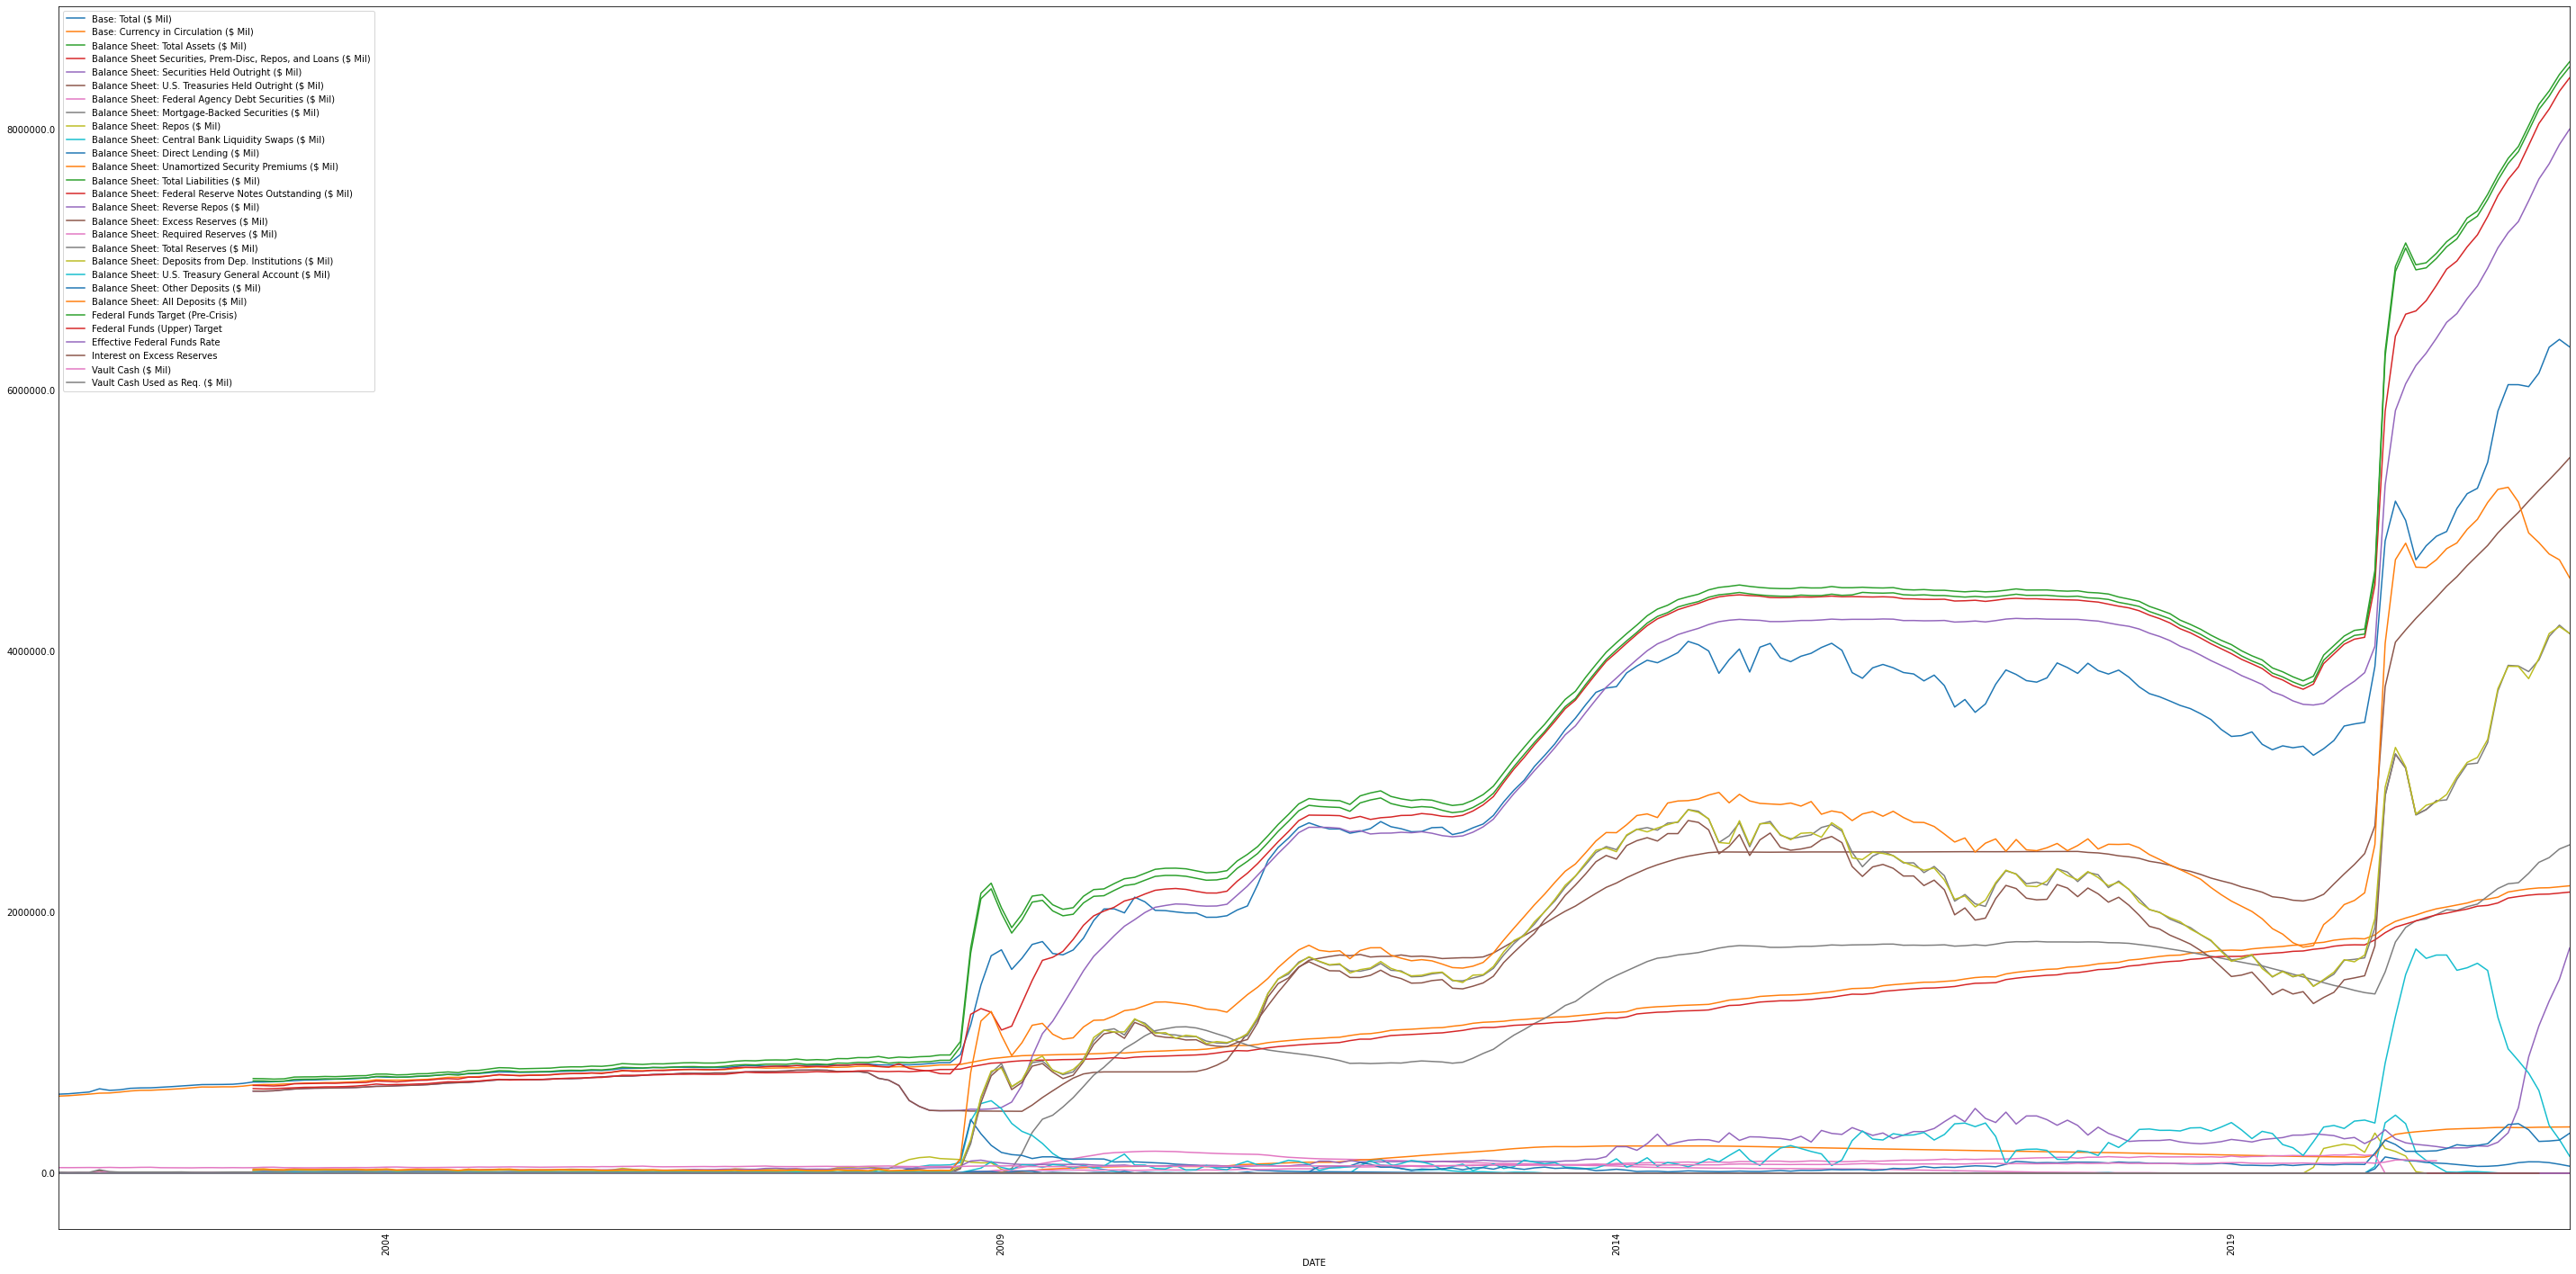

In [9]:
plot_lines(df = data, linewidth = 1.5, figsize = (50, 25), pp = None)


<ipython-input-8-abc1d860338b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


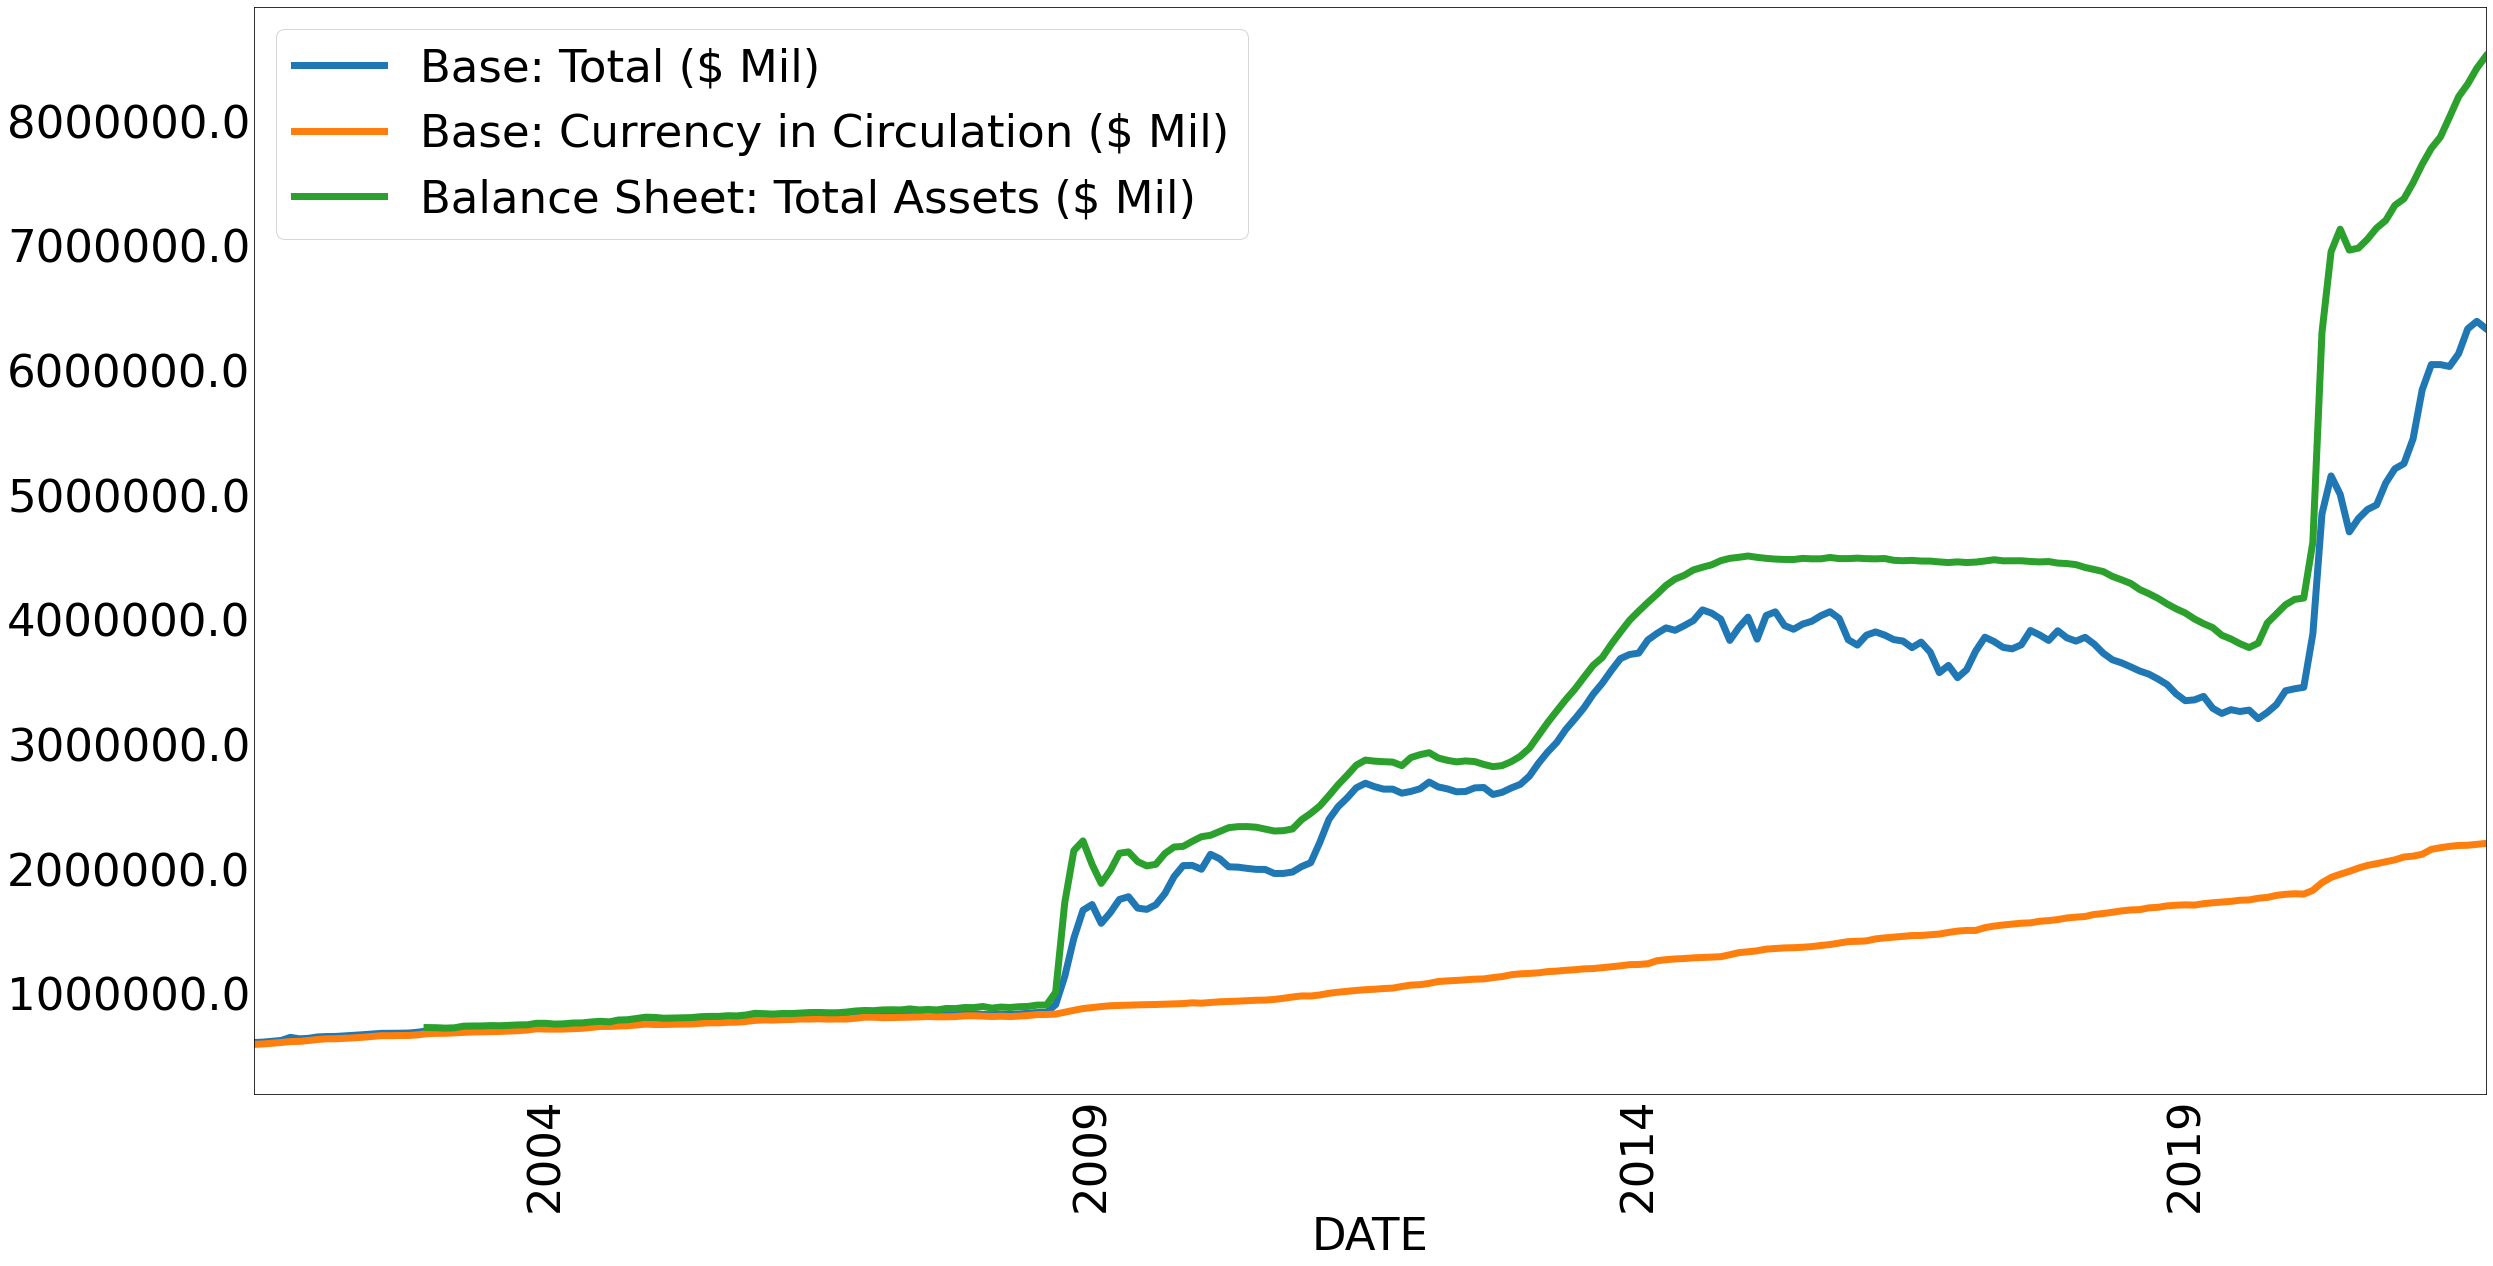

In [10]:
plt.rcParams.update({"font.size":45})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Assets ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 7, figsize = (40, 20), pp = None)

<ipython-input-8-abc1d860338b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


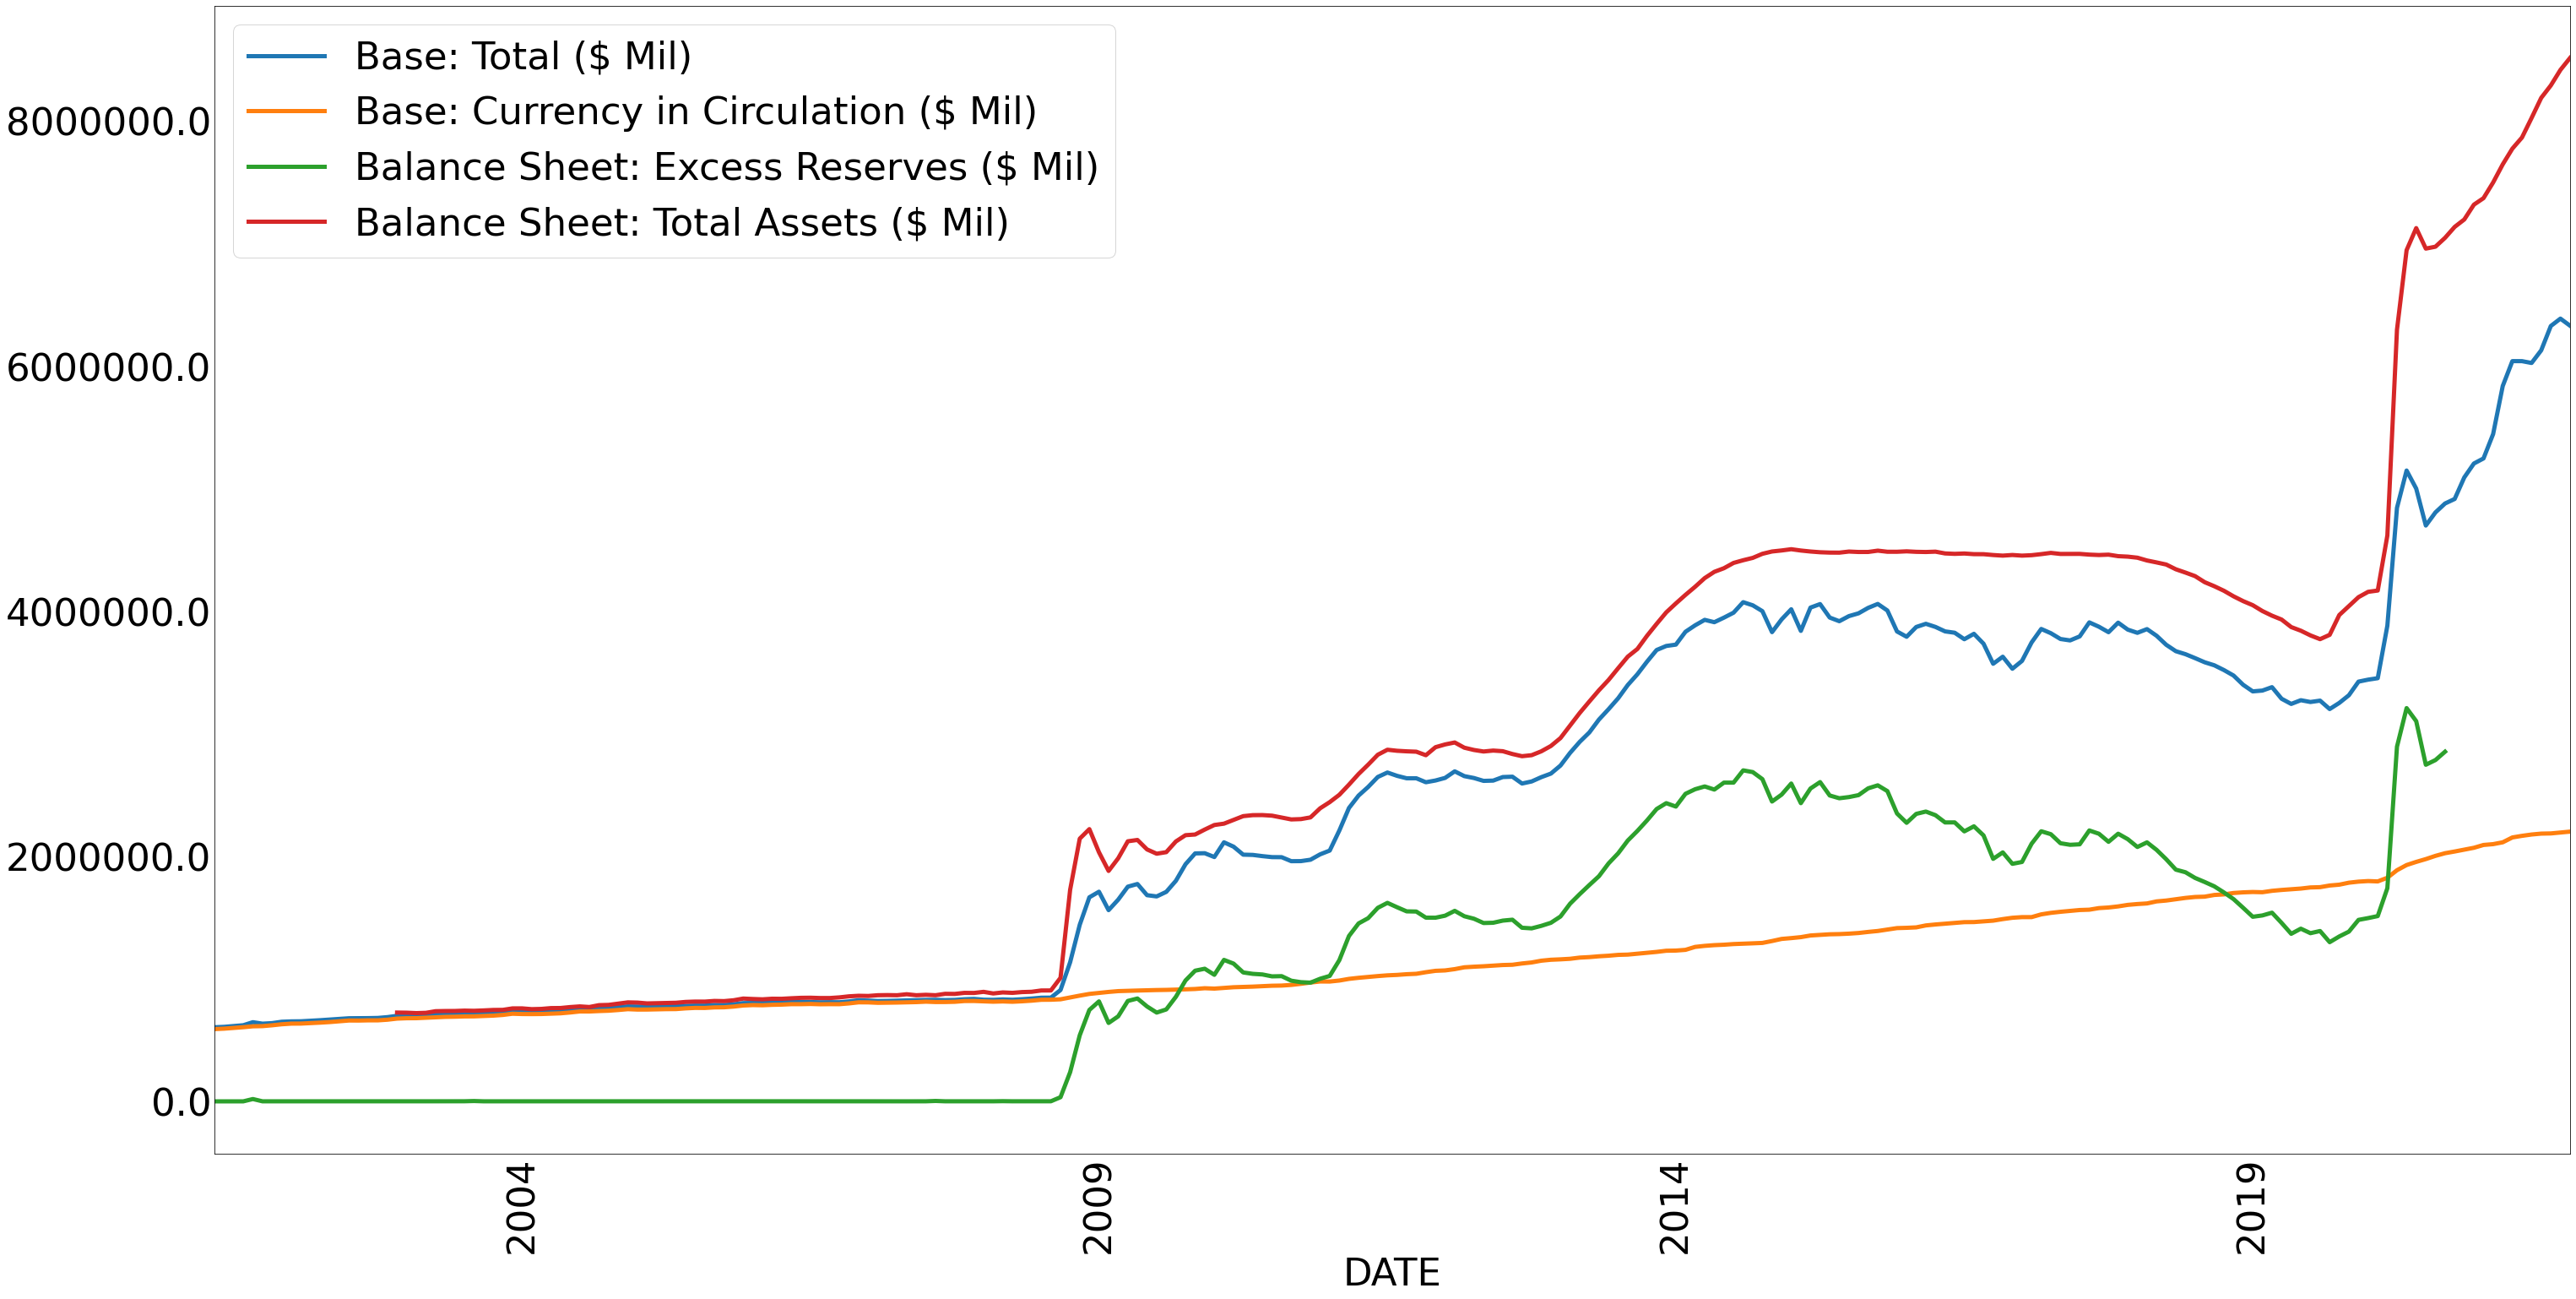

In [11]:
plt.rcParams.update({"font.size":45})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Total Assets ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (50, 25), pp = None)

In [12]:
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), 
                       pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
#changes money from millions to trillions 
    
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "m",
              label = total_var, ls = "--")
    ax.legend(loc=2, ncol = 2)

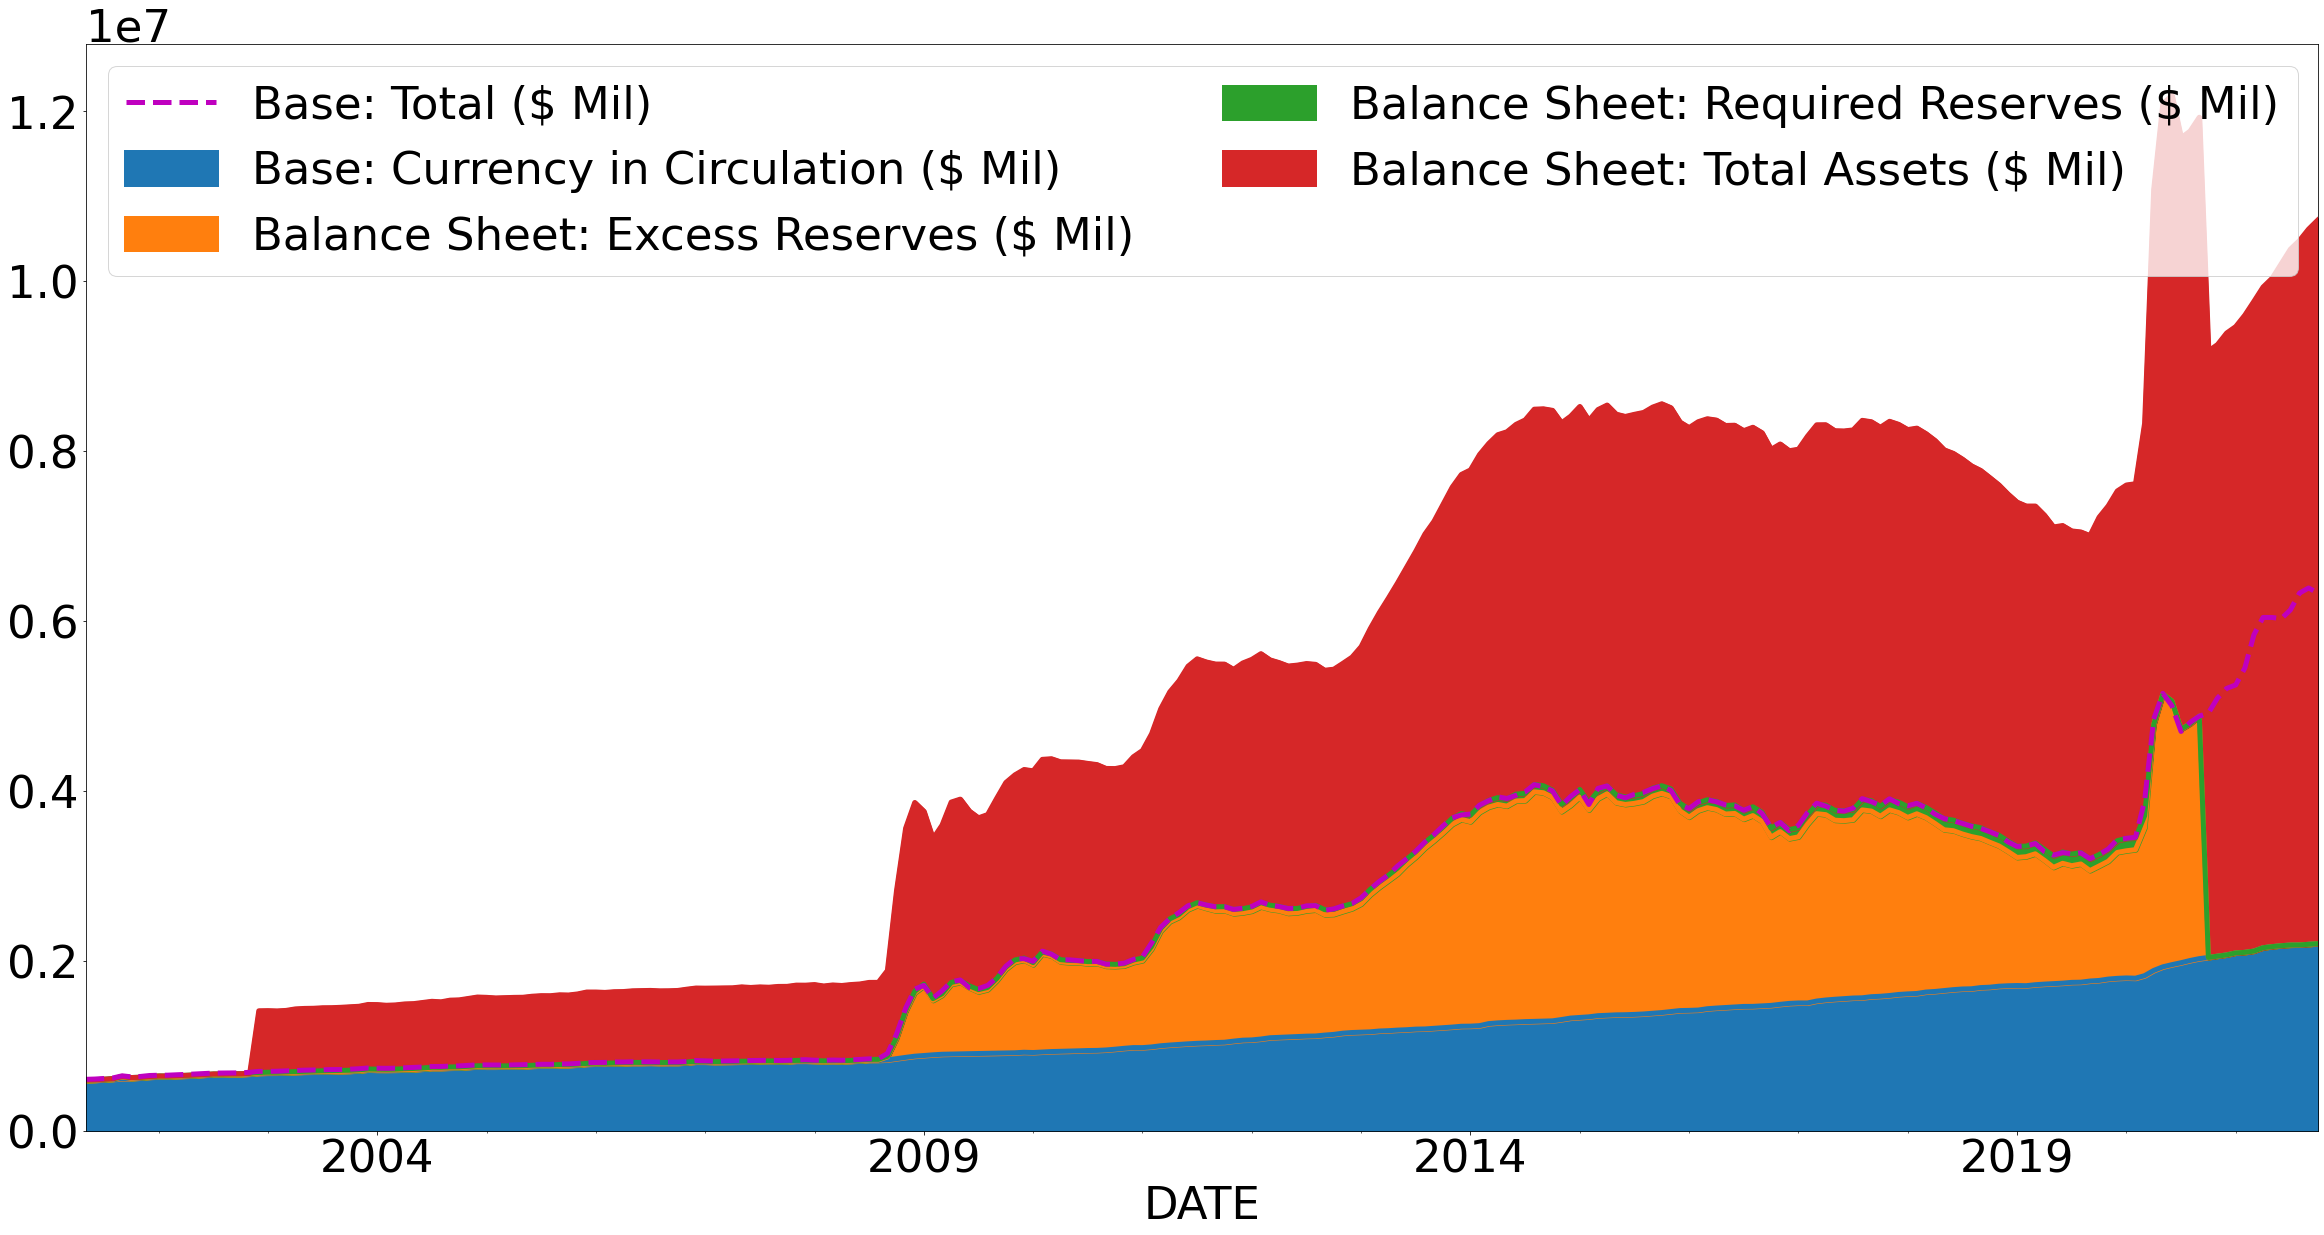

In [13]:
reserve_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Required Reserves ($ Mil)",
               "Balance Sheet: Total Assets ($ Mil)"]
plot_stacked_lines(data, reserve_vars, linewidth = 5, total_var = "Base: Total ($ Mil)")

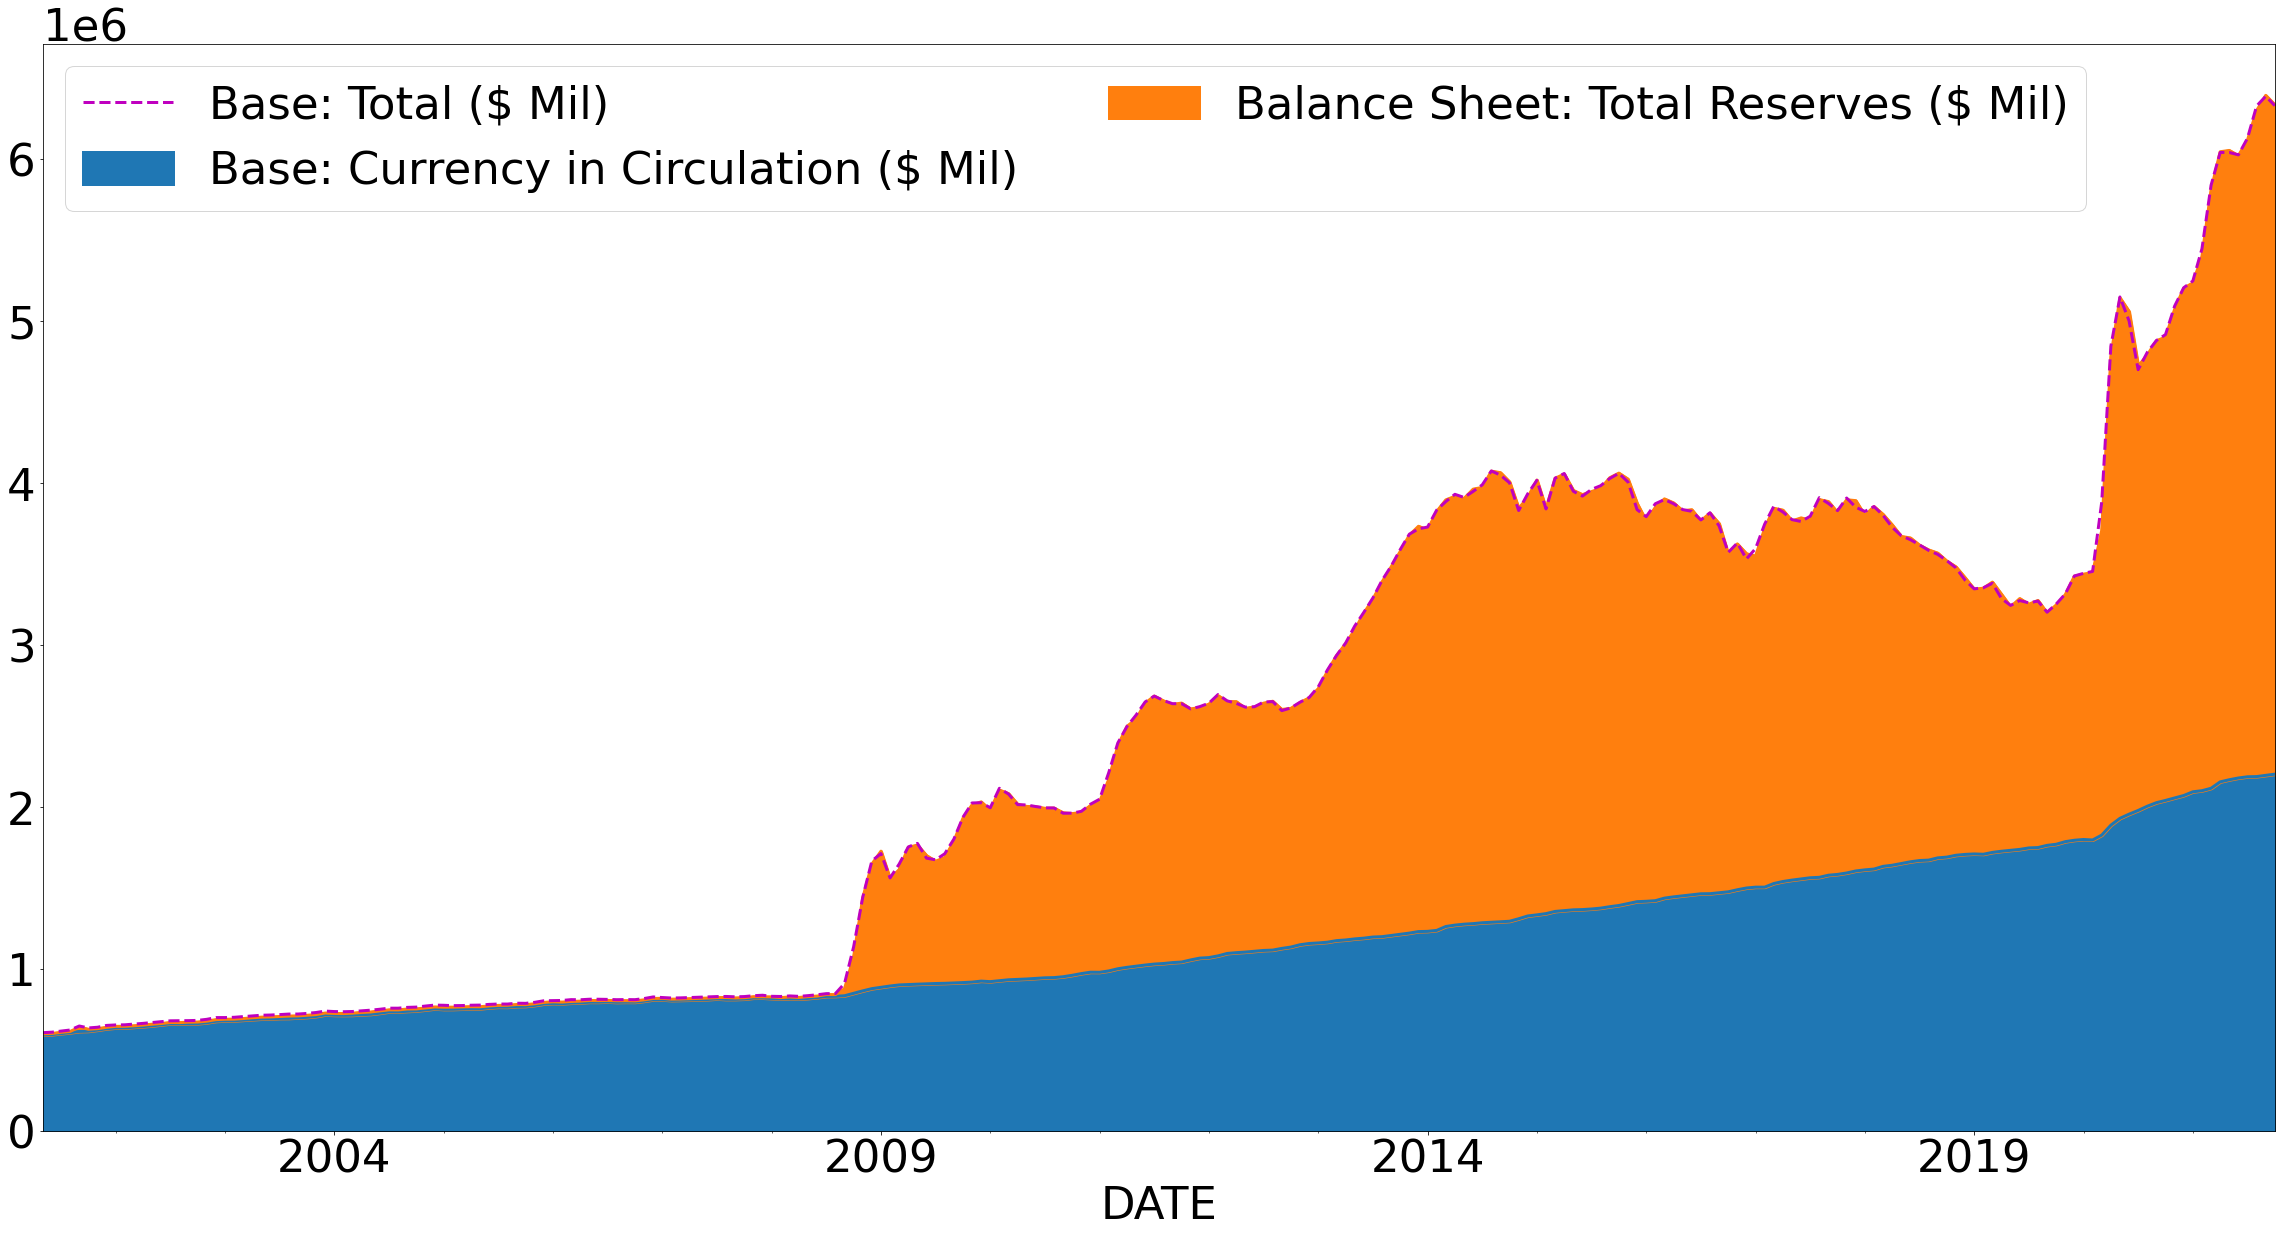

In [14]:
reserve_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
plot_stacked_lines(data, reserve_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")



<ipython-input-8-abc1d860338b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


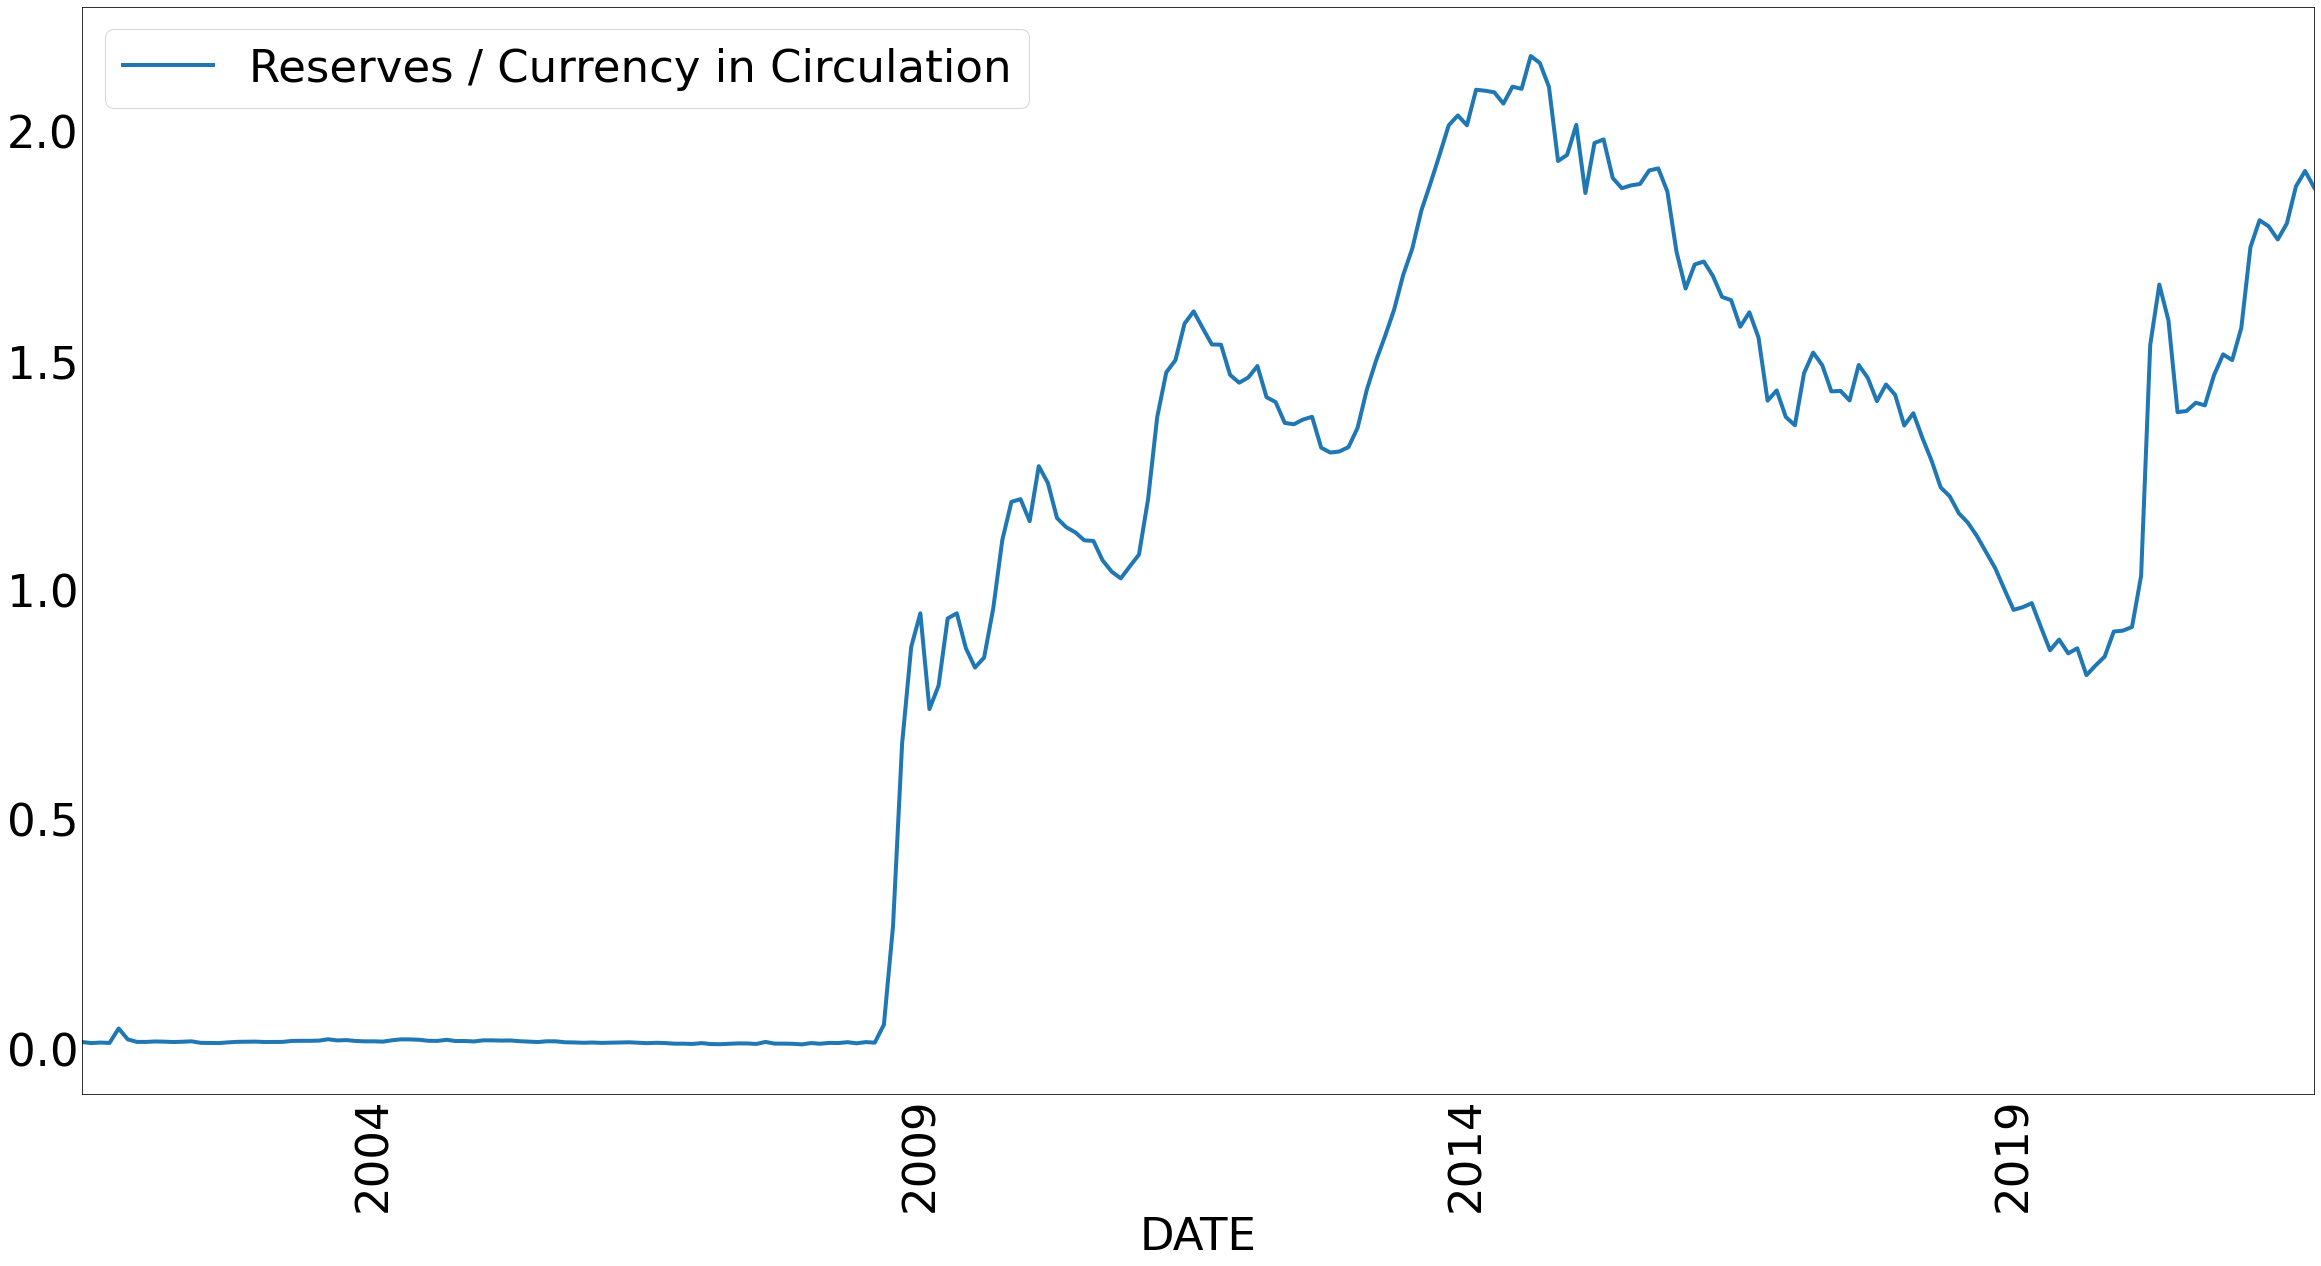

In [15]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])

reserve_vars = ["Reserves / Currency in Circulation"]

plot_lines(data[reserve_vars], linewidth = 4, save_fig = False)

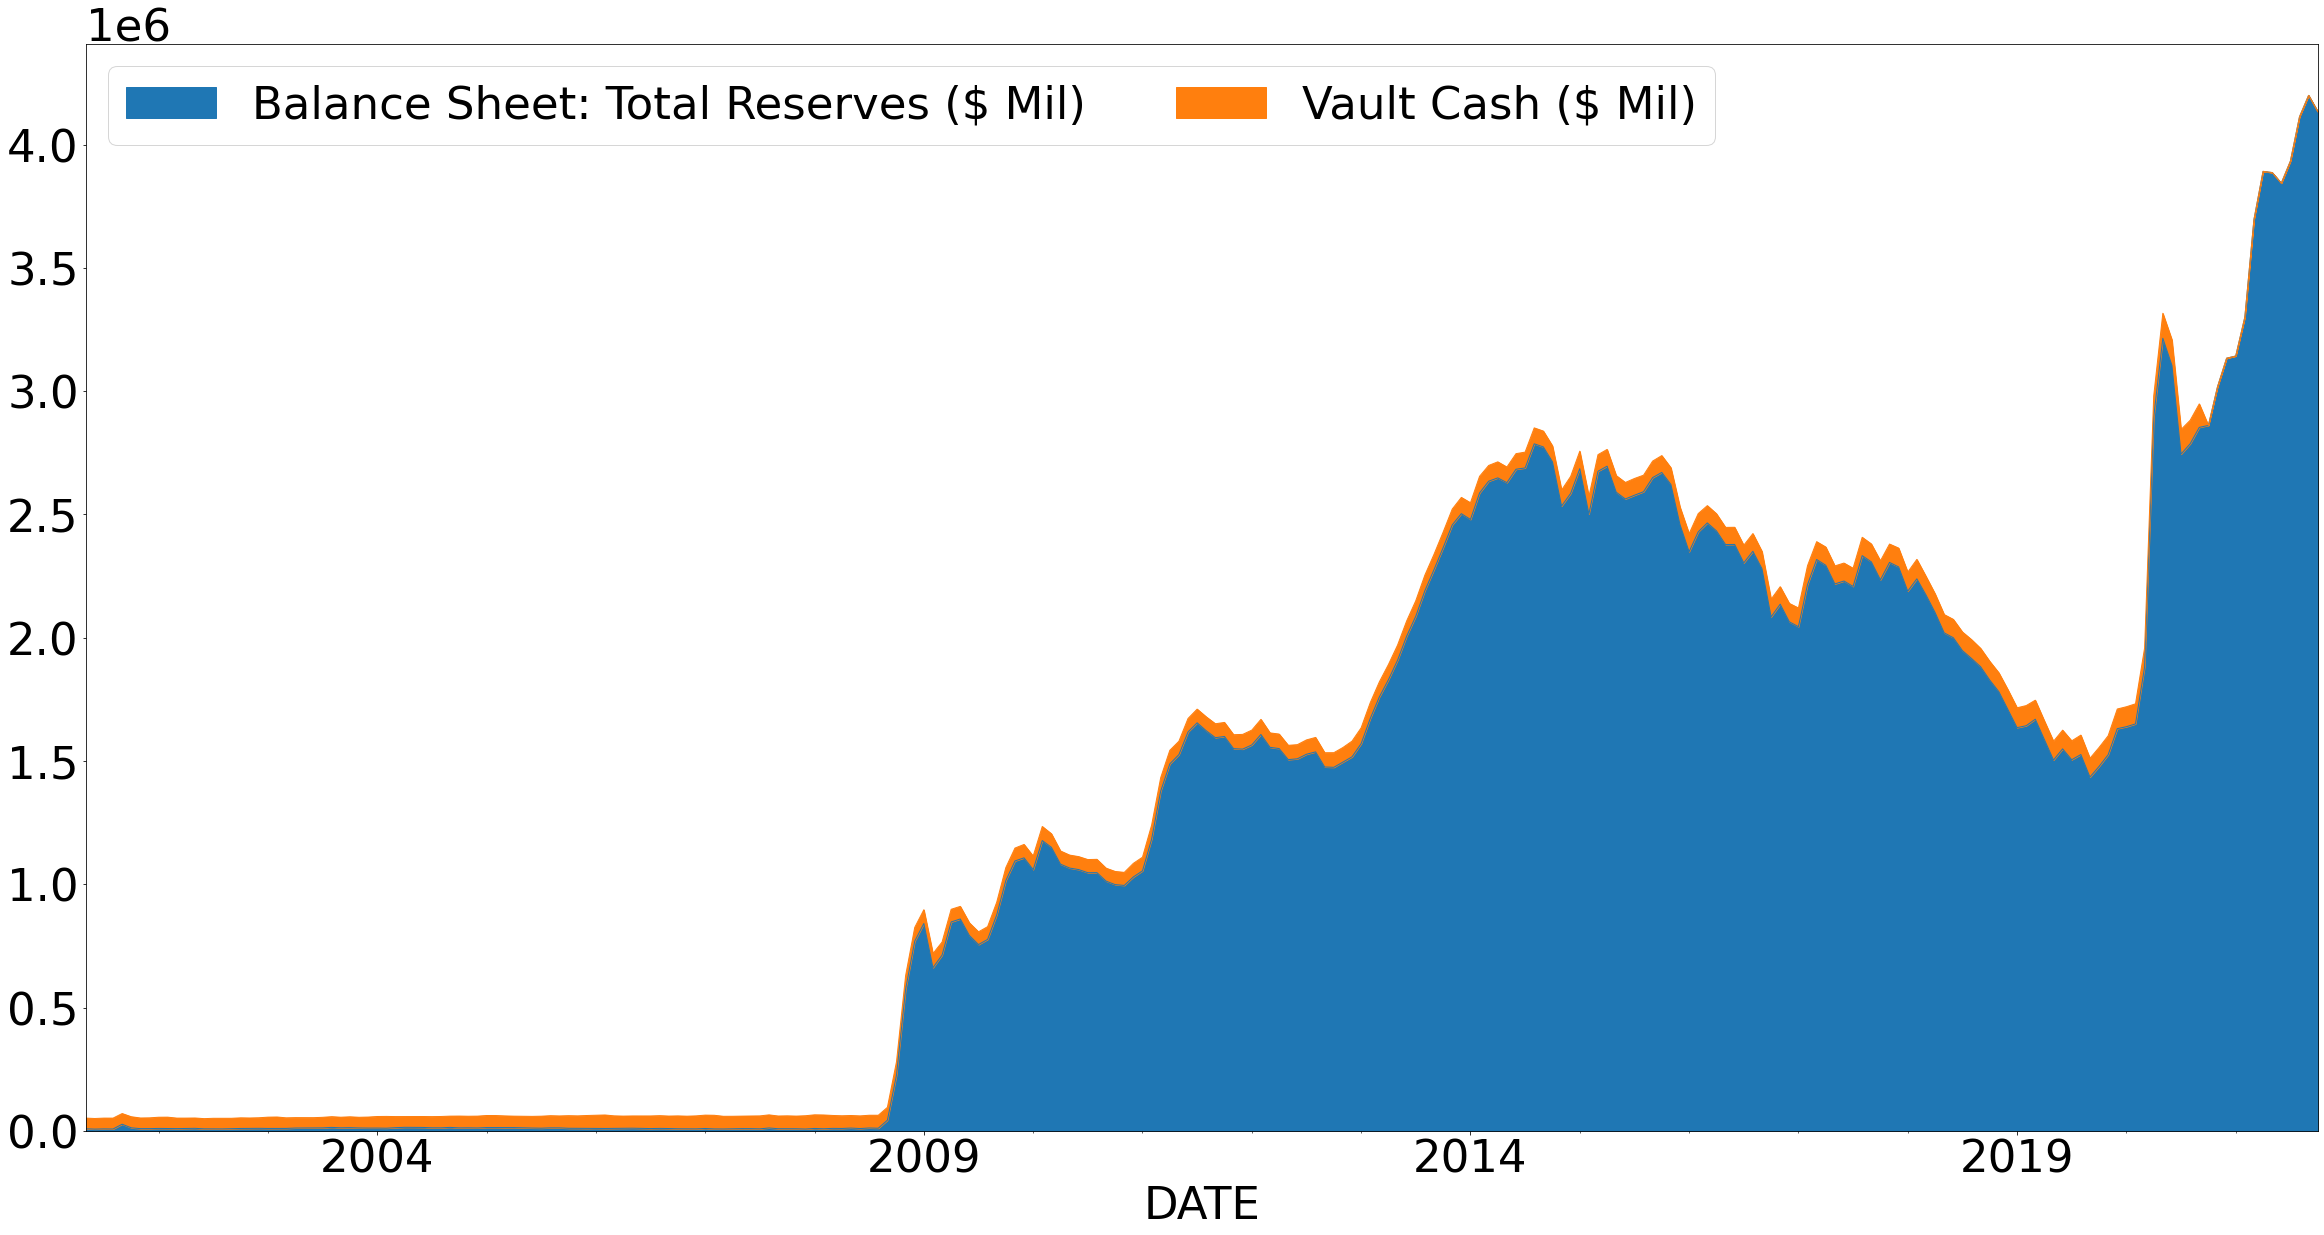

In [16]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_stacked_lines(data, reserve_vars)

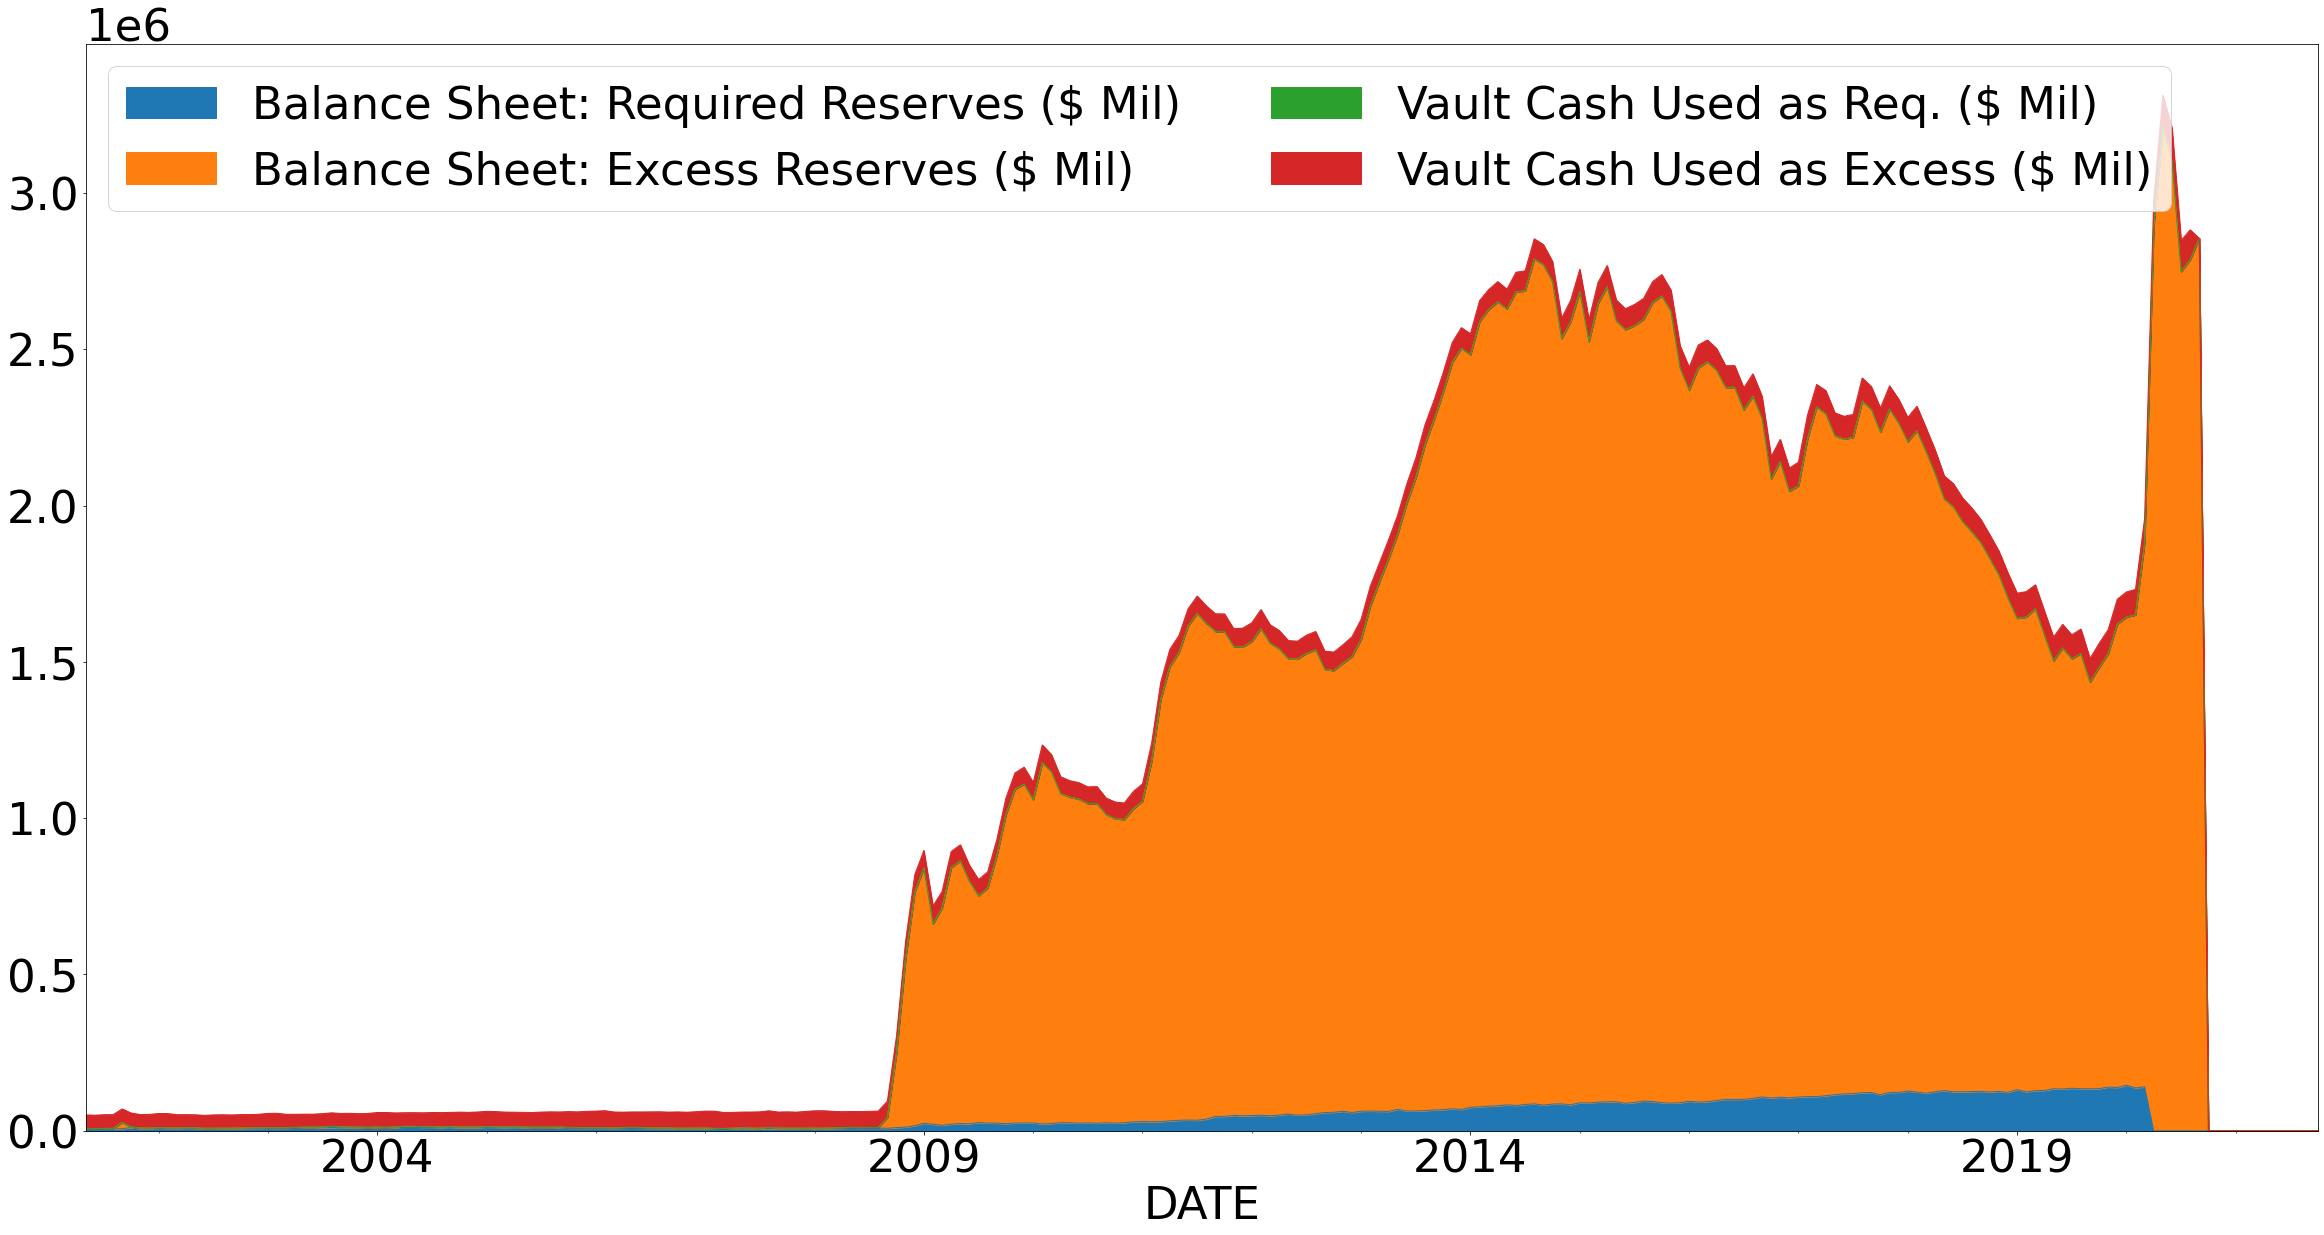

In [17]:
data["Vault Cash Used as Excess ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(
    data["Vault Cash Used as Req. ($ Mil)"])

reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)",
                "Balance Sheet: Excess Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
                "Vault Cash Used as Excess ($ Mil)",]
plot_stacked_lines(data, reserve_vars)

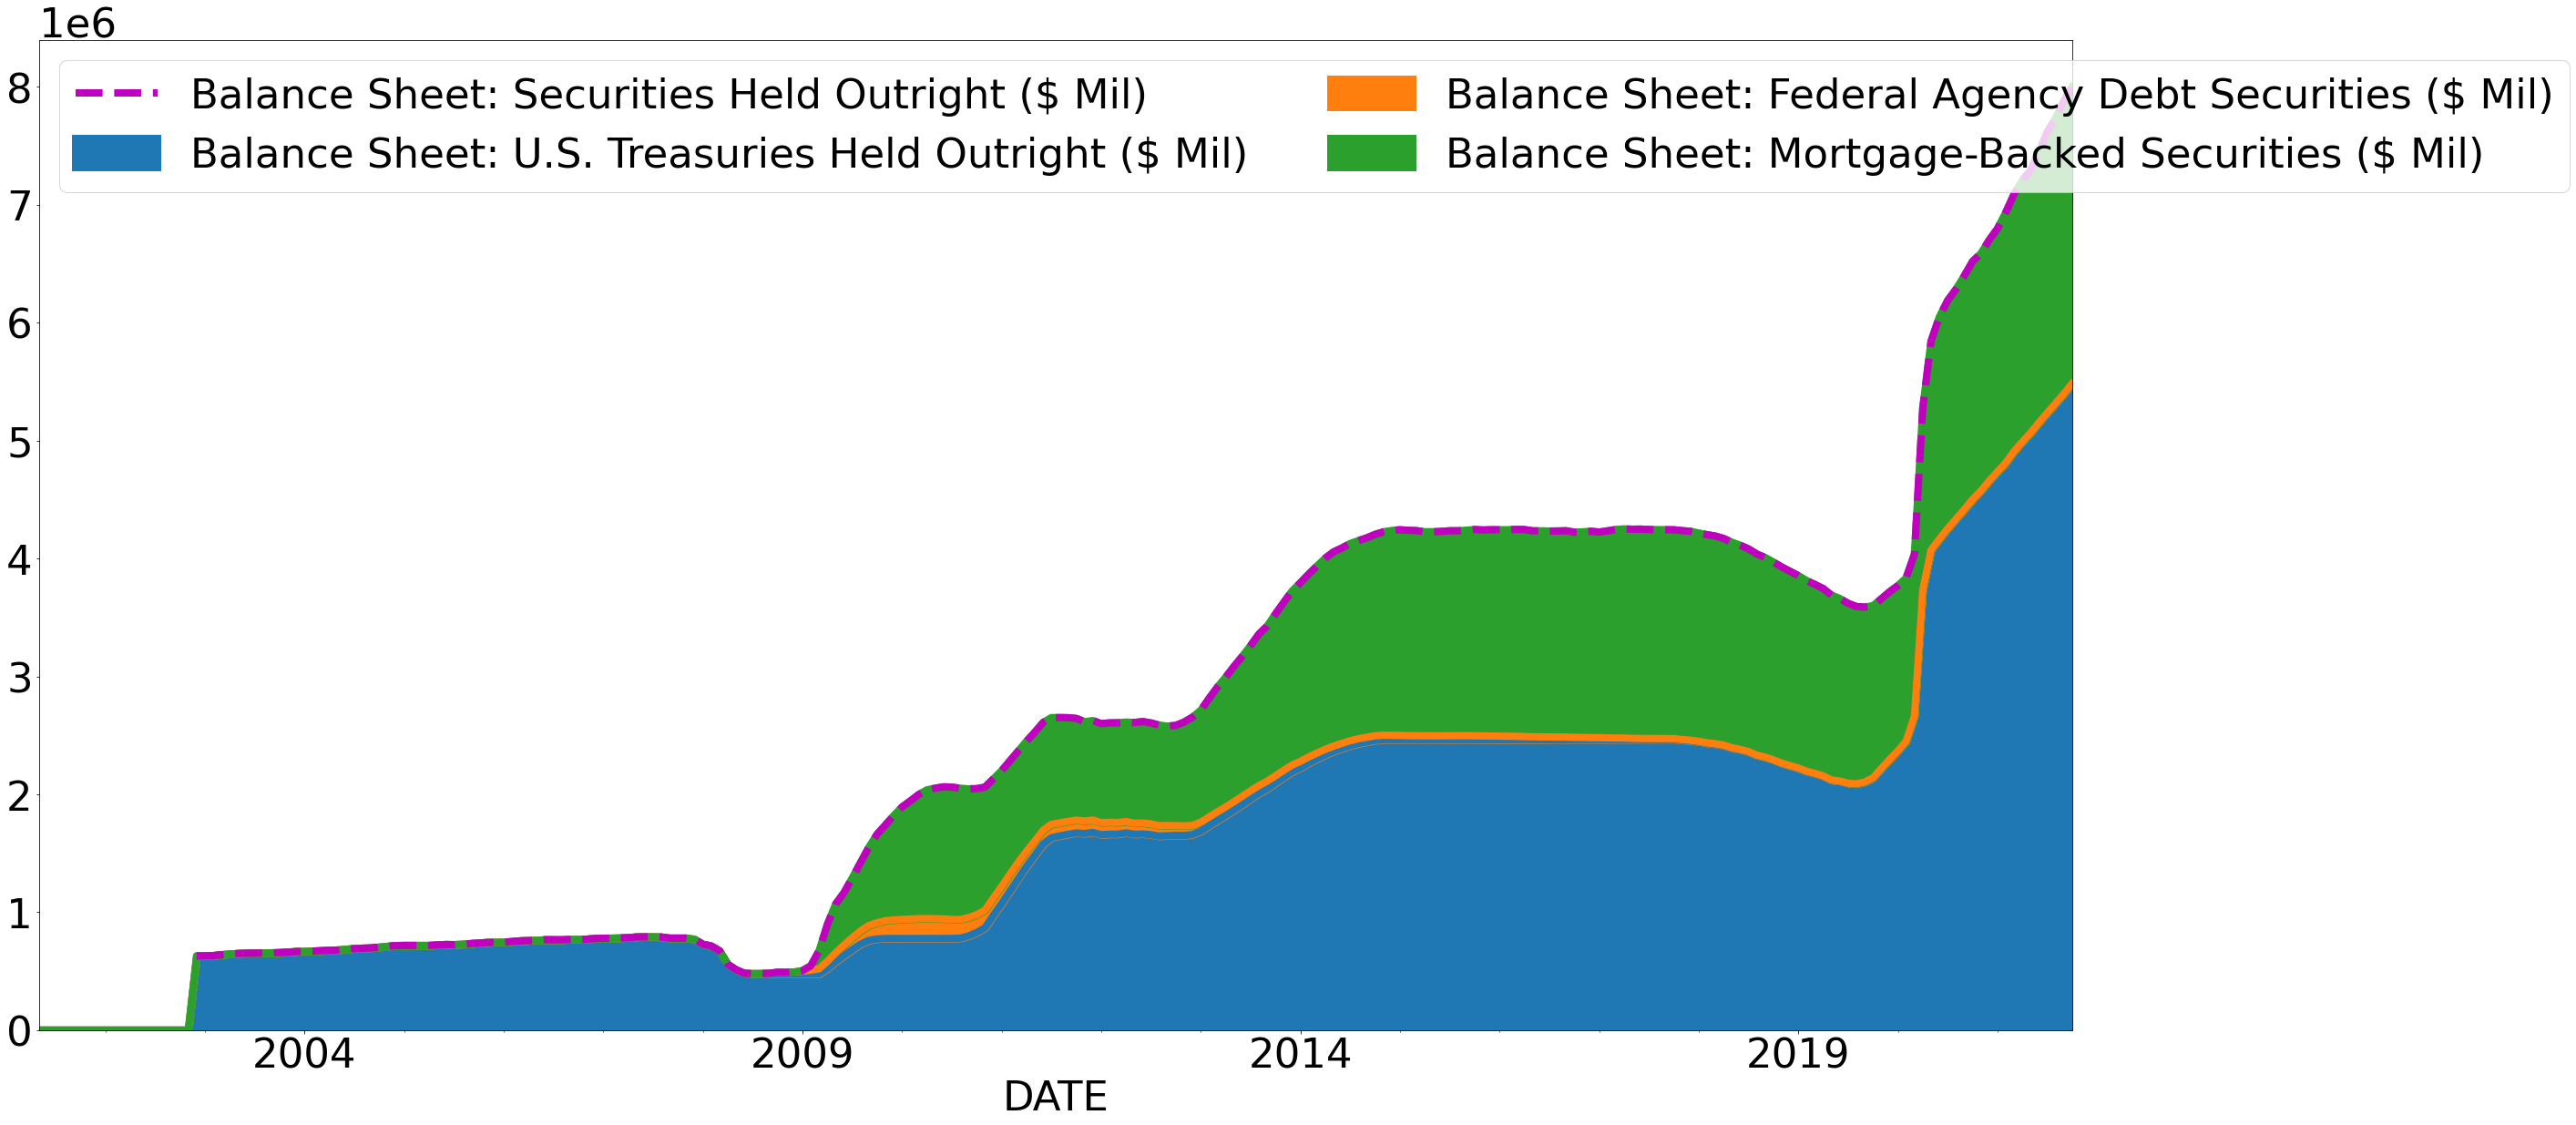

In [26]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
#shows how mutch of each sicutiry the fed has
plot_stacked_lines(data, account_vars, linewidth = 8, 
                   total_var = "Balance Sheet: Securities Held Outright ($ Mil)")


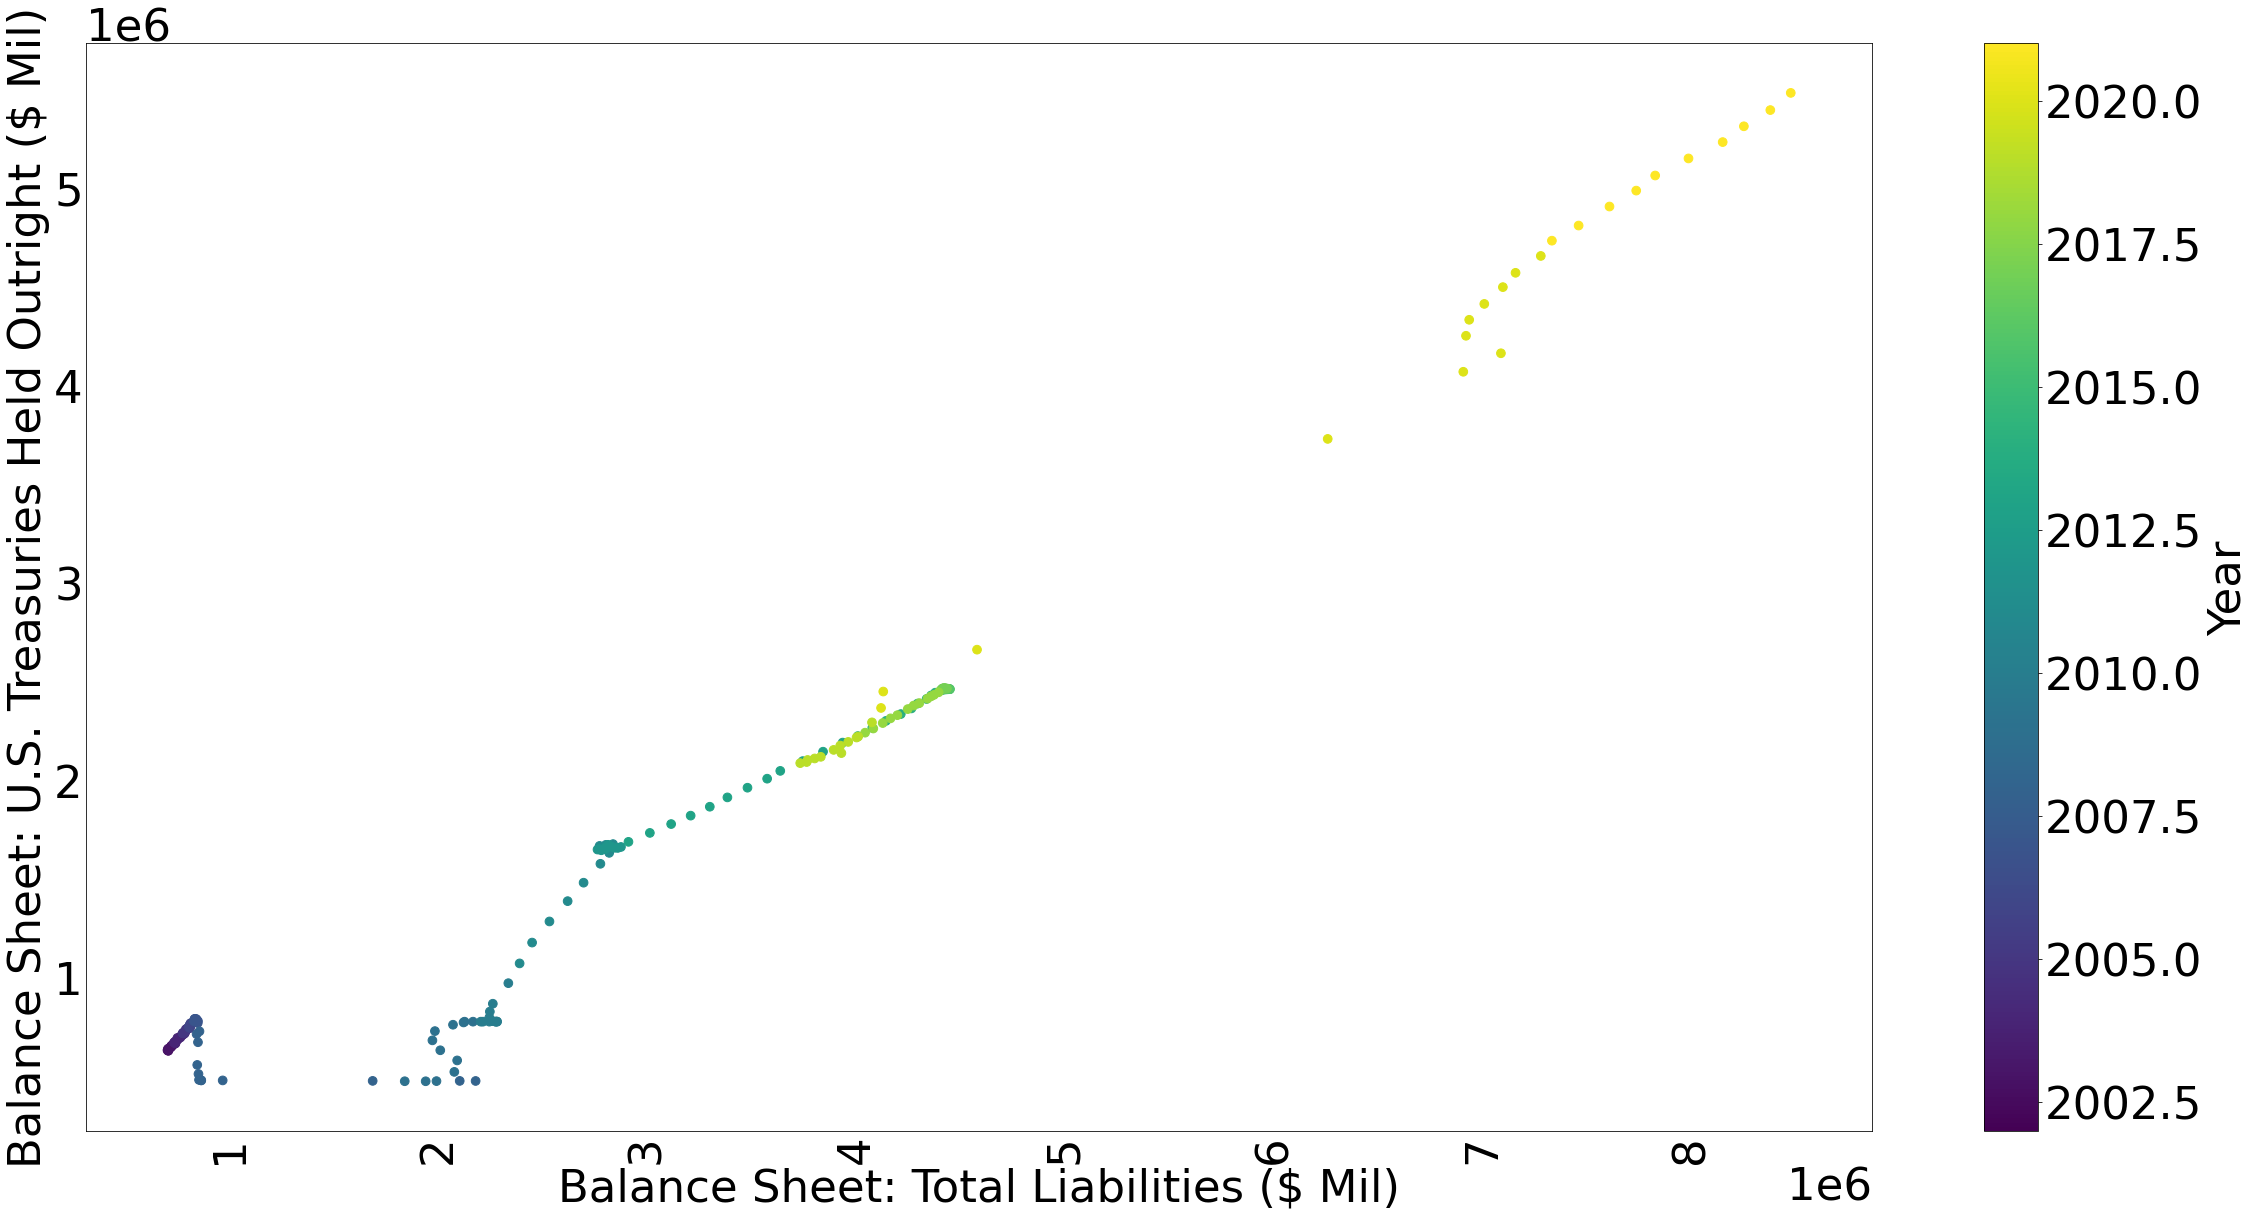

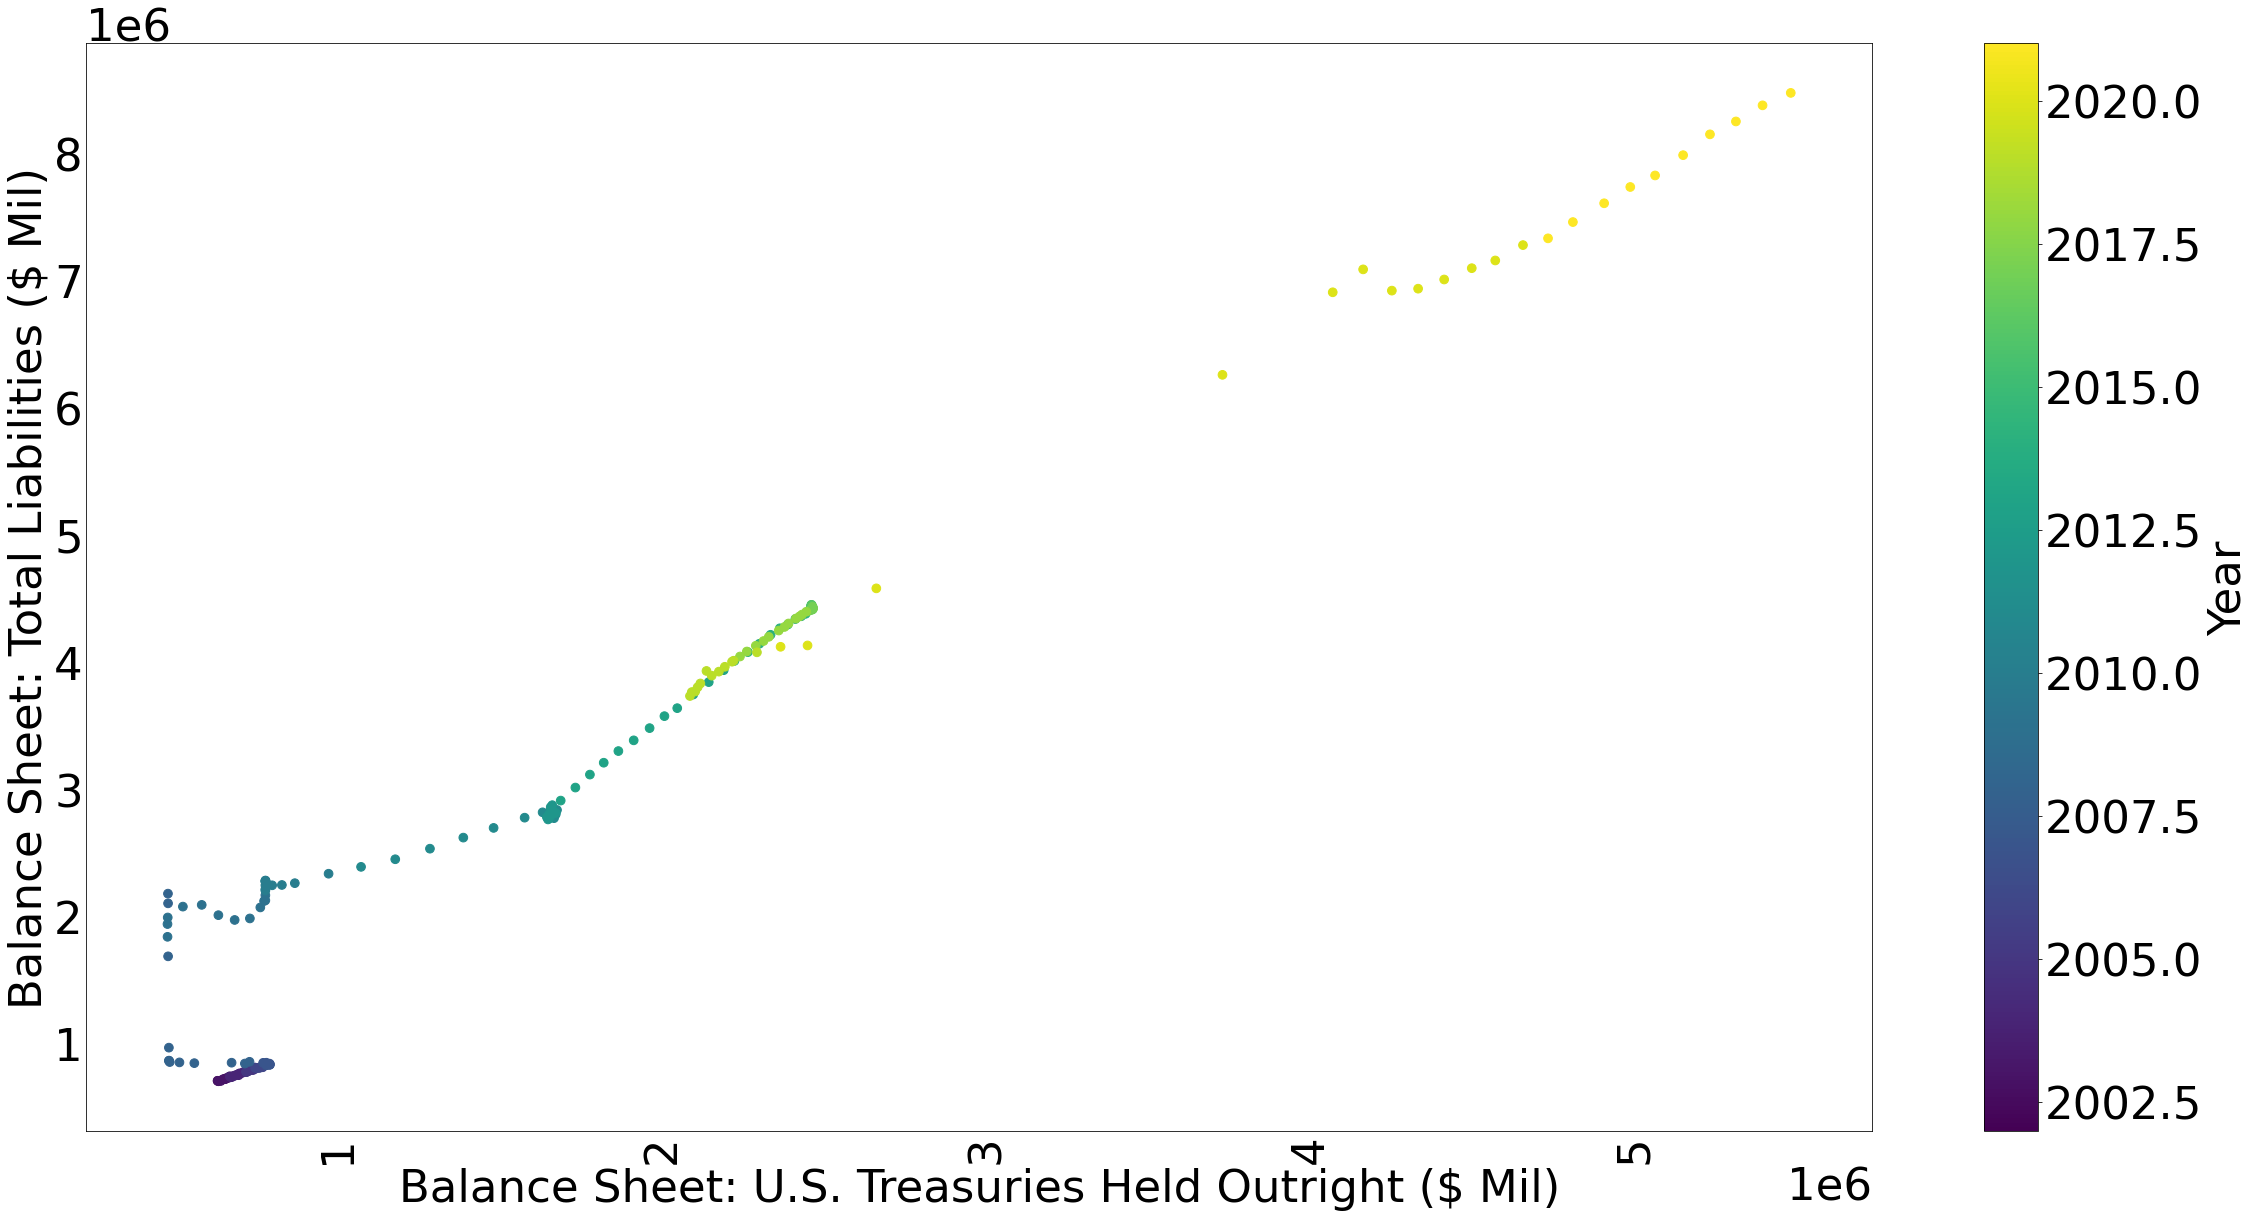

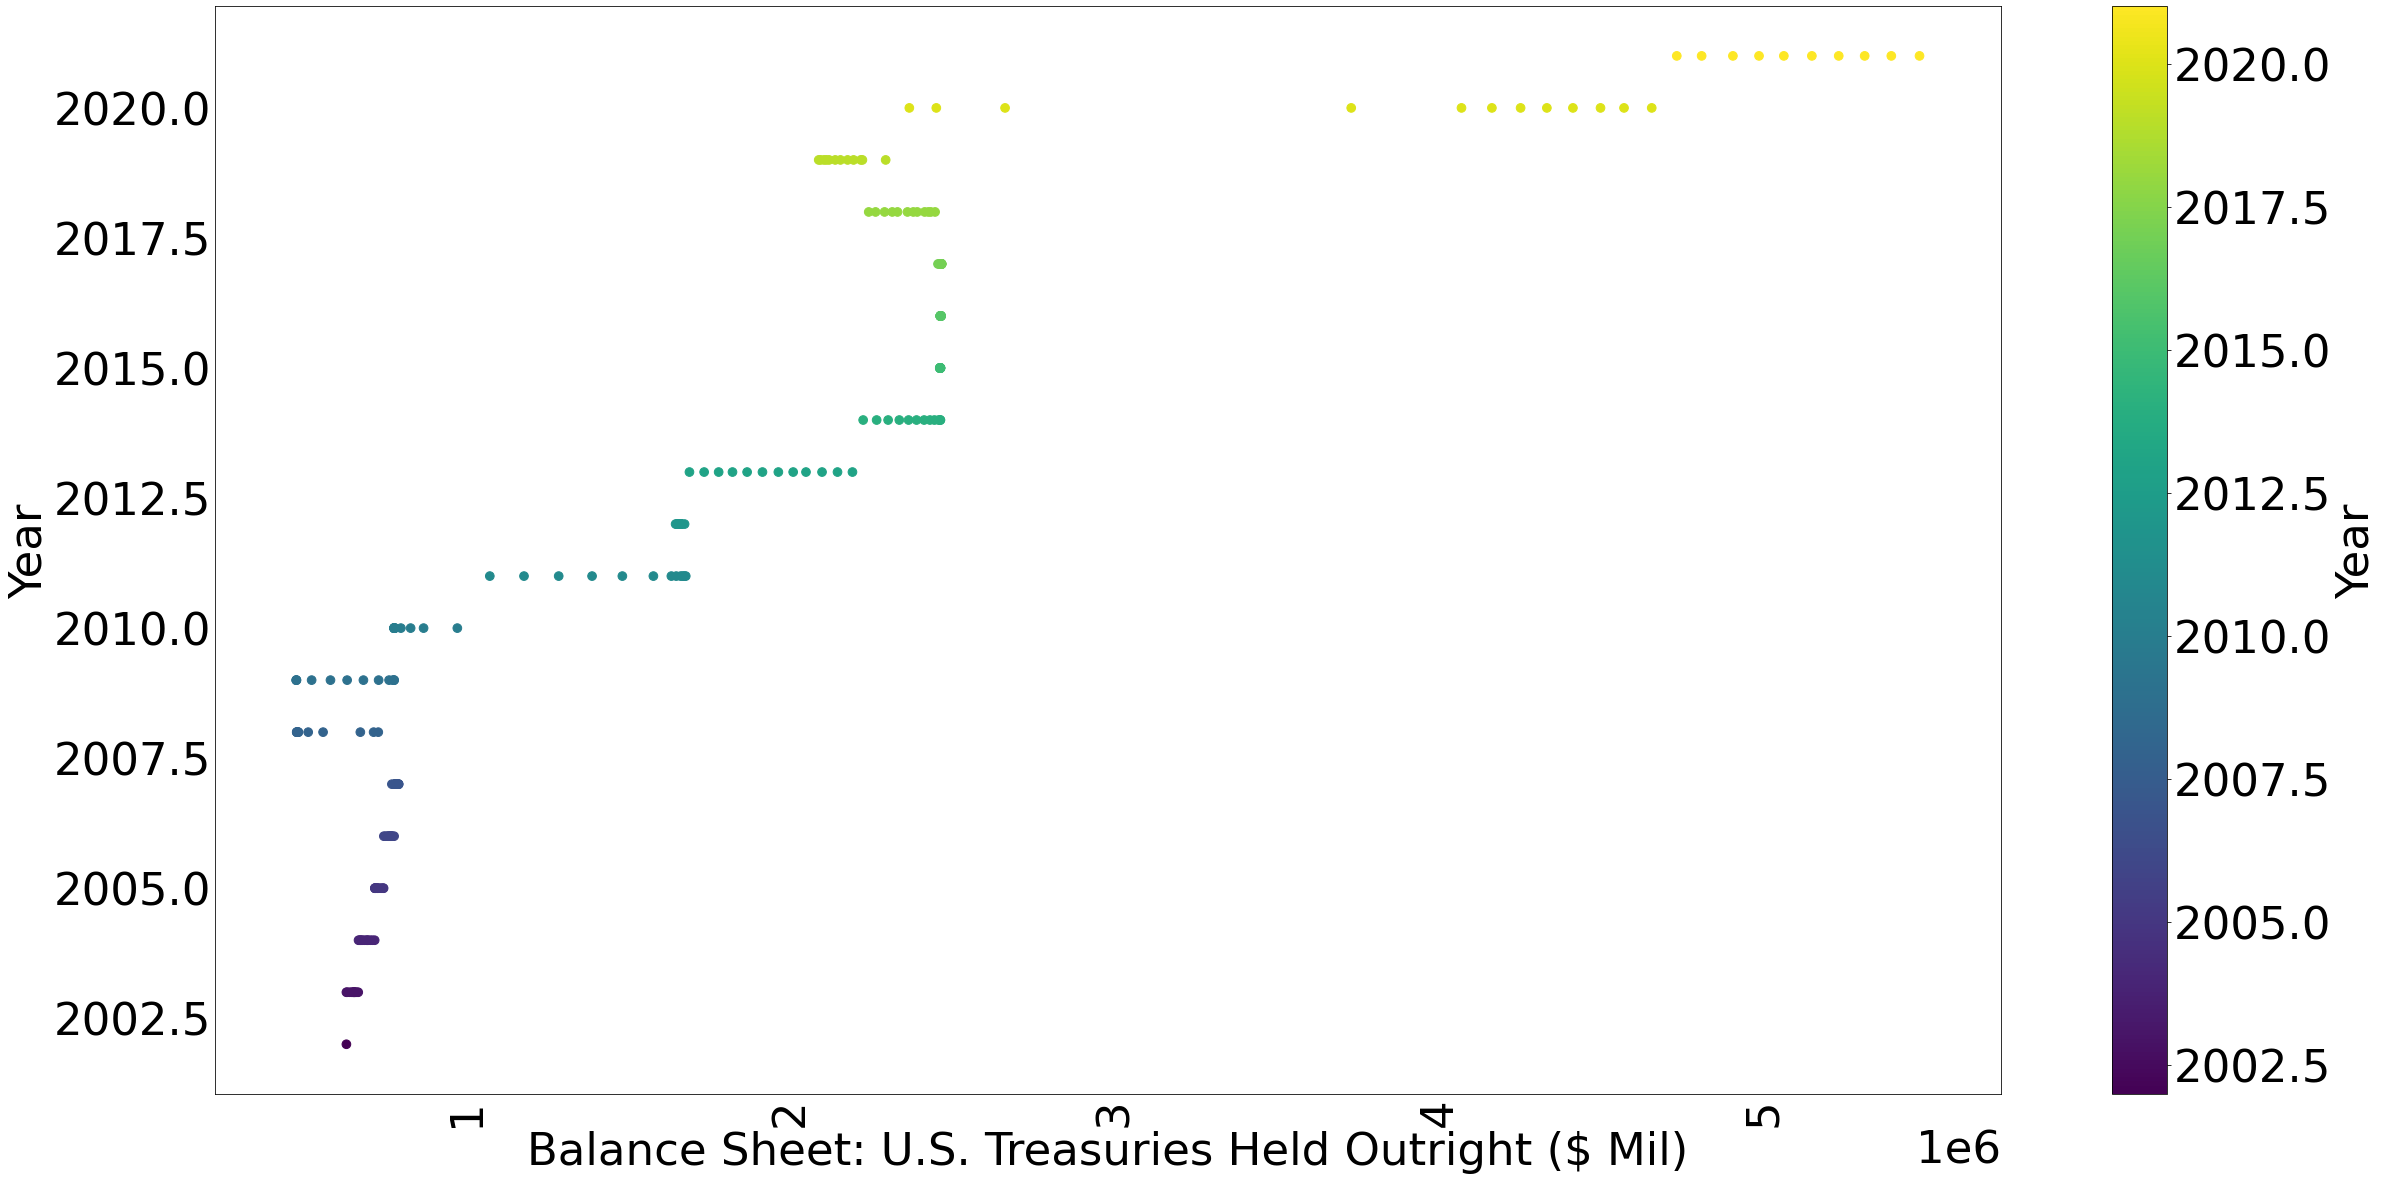

In [19]:
scatter_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]
make_a_scatter(data[scatter_vars])

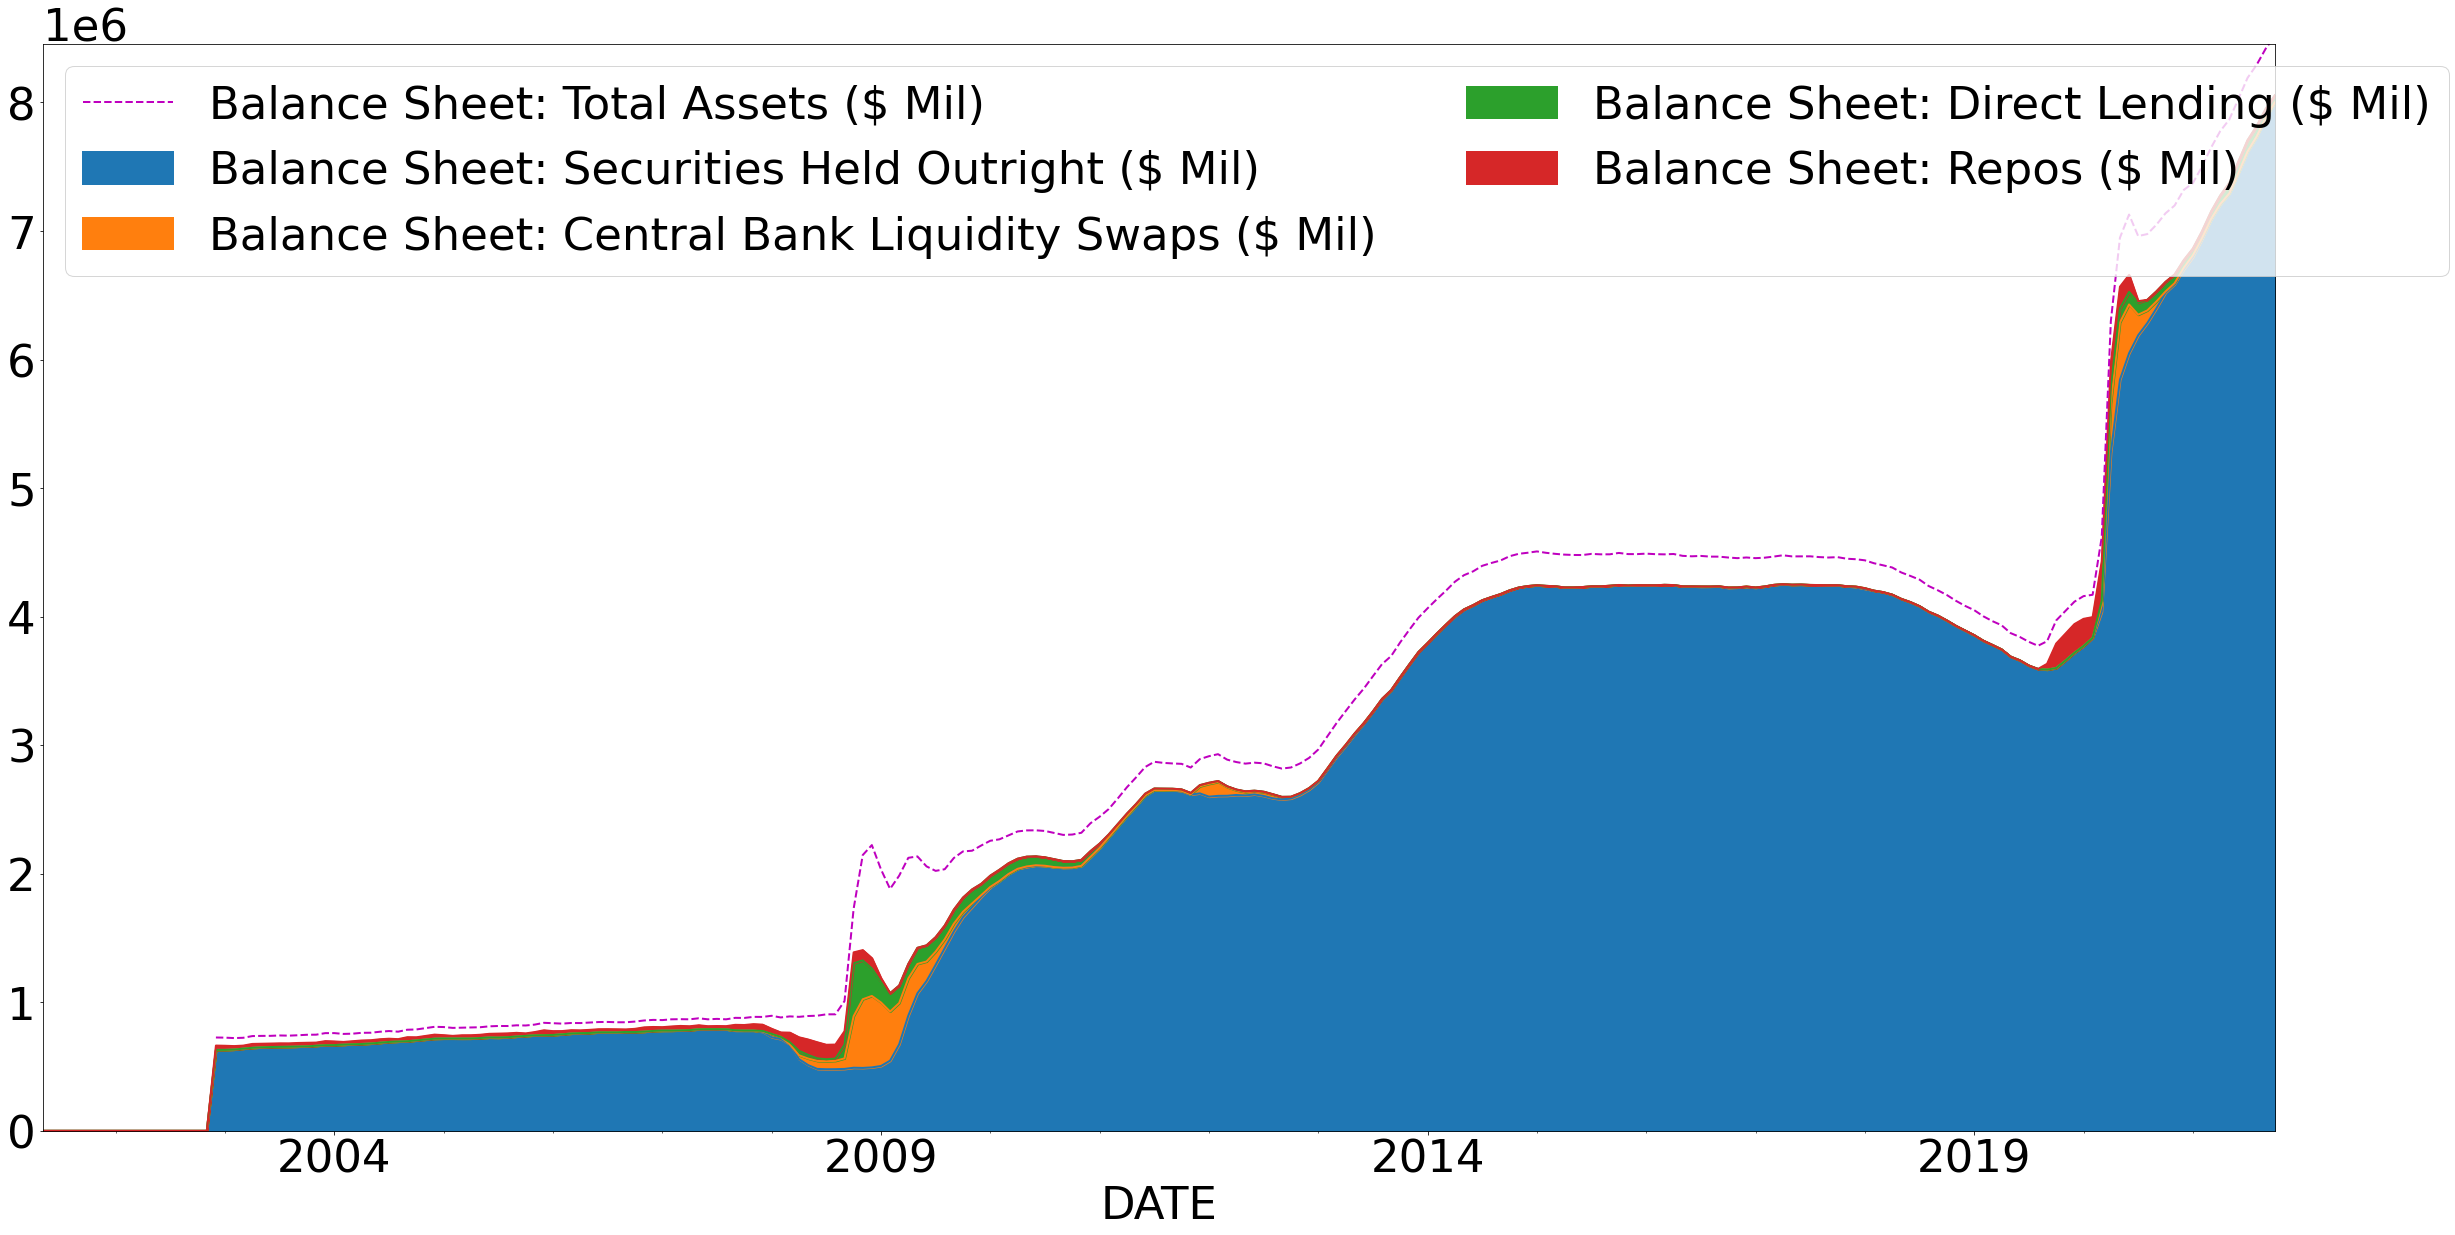

In [20]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 2, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")


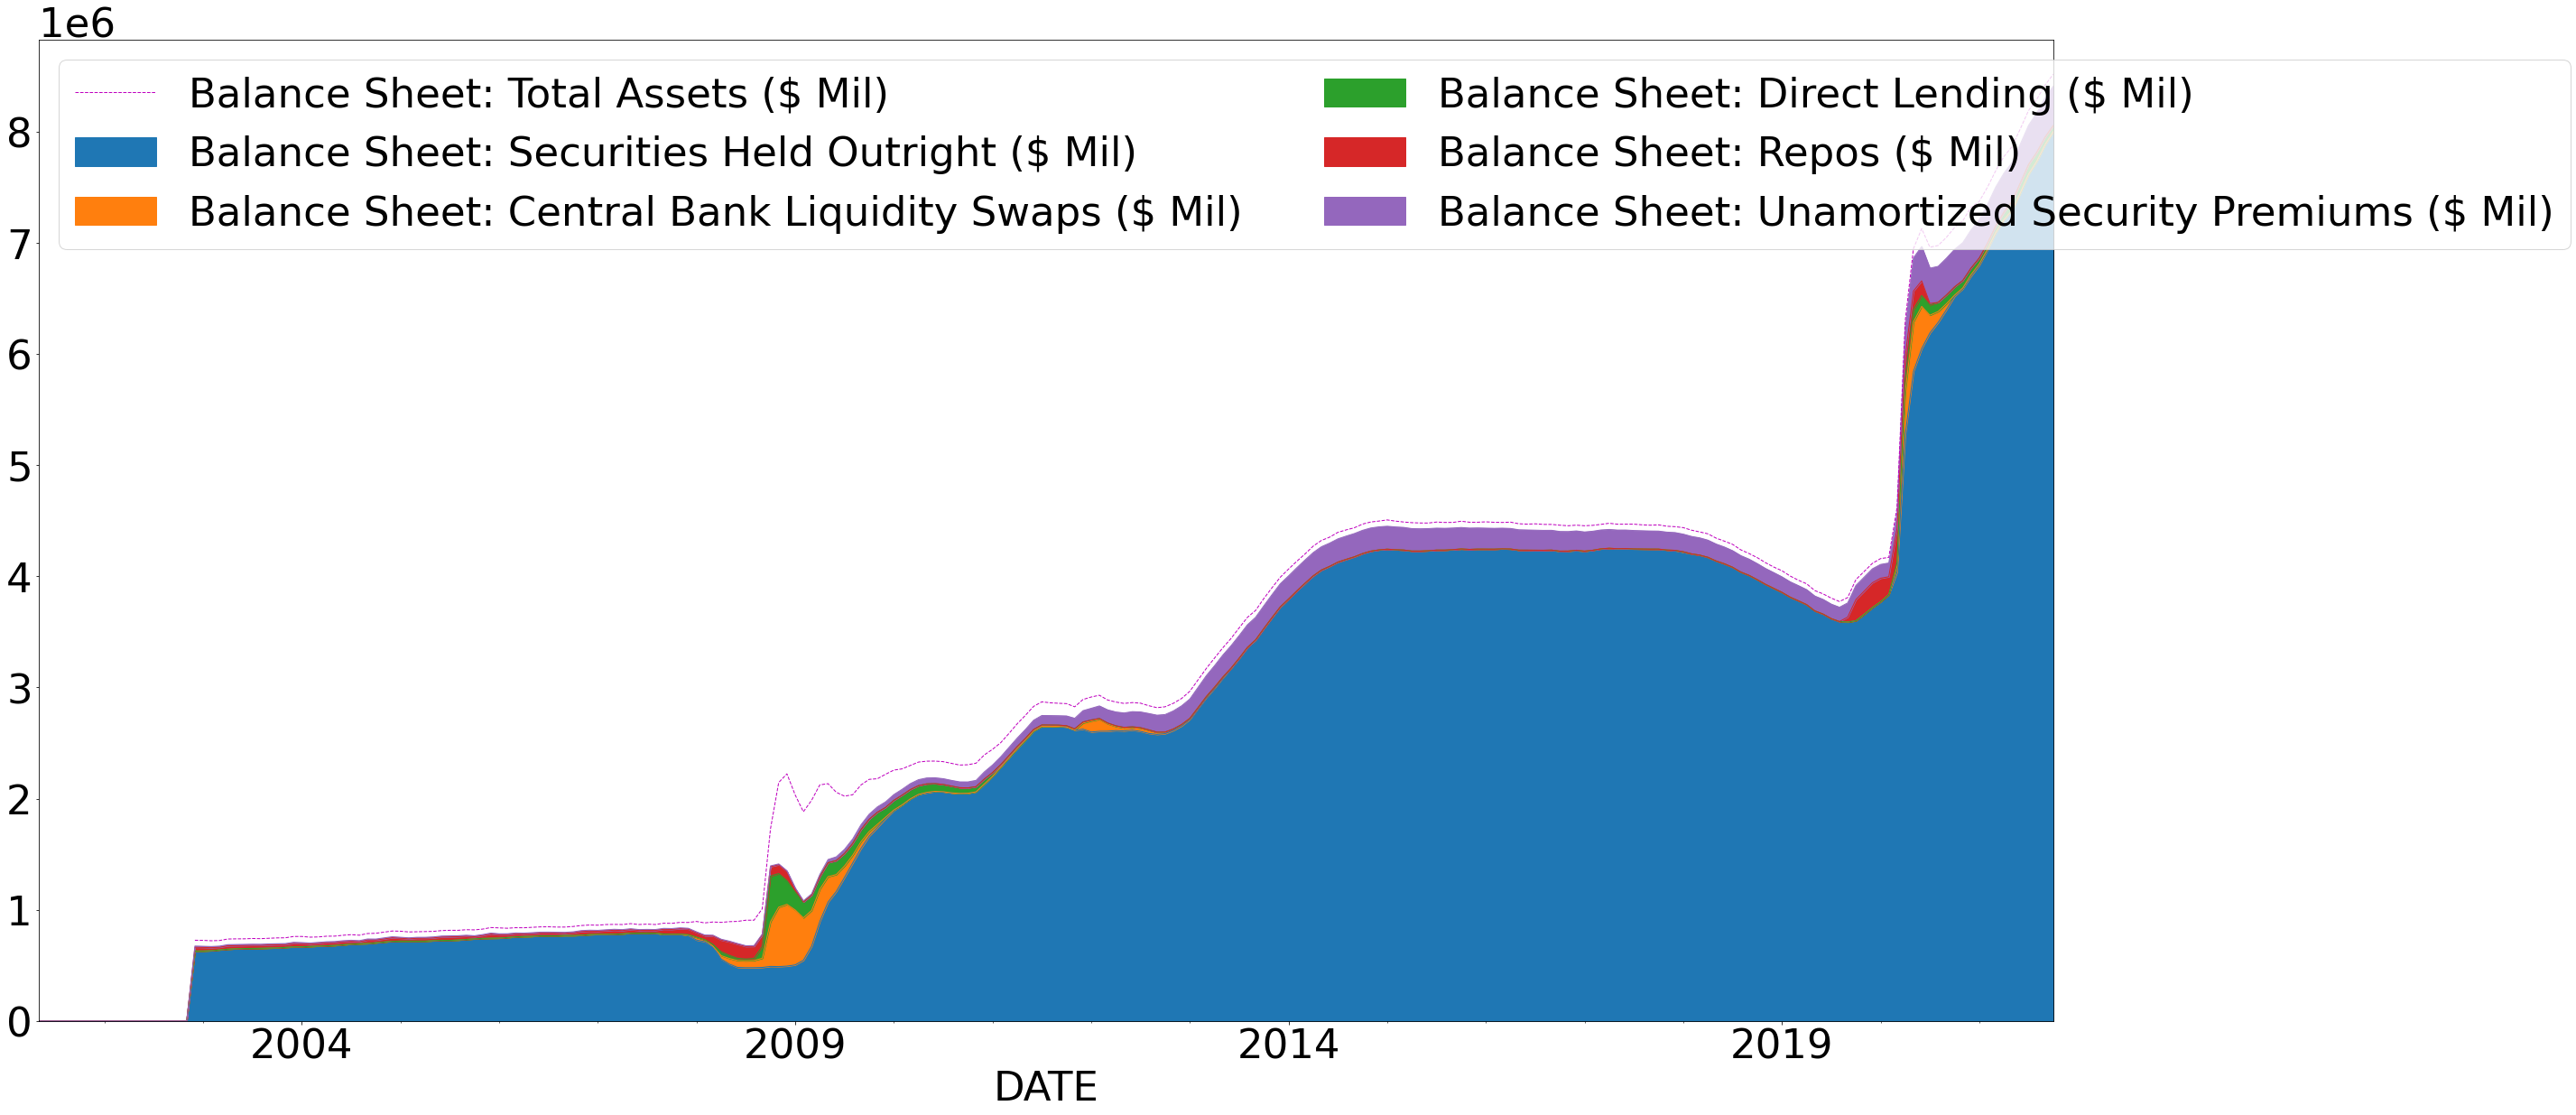

In [21]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

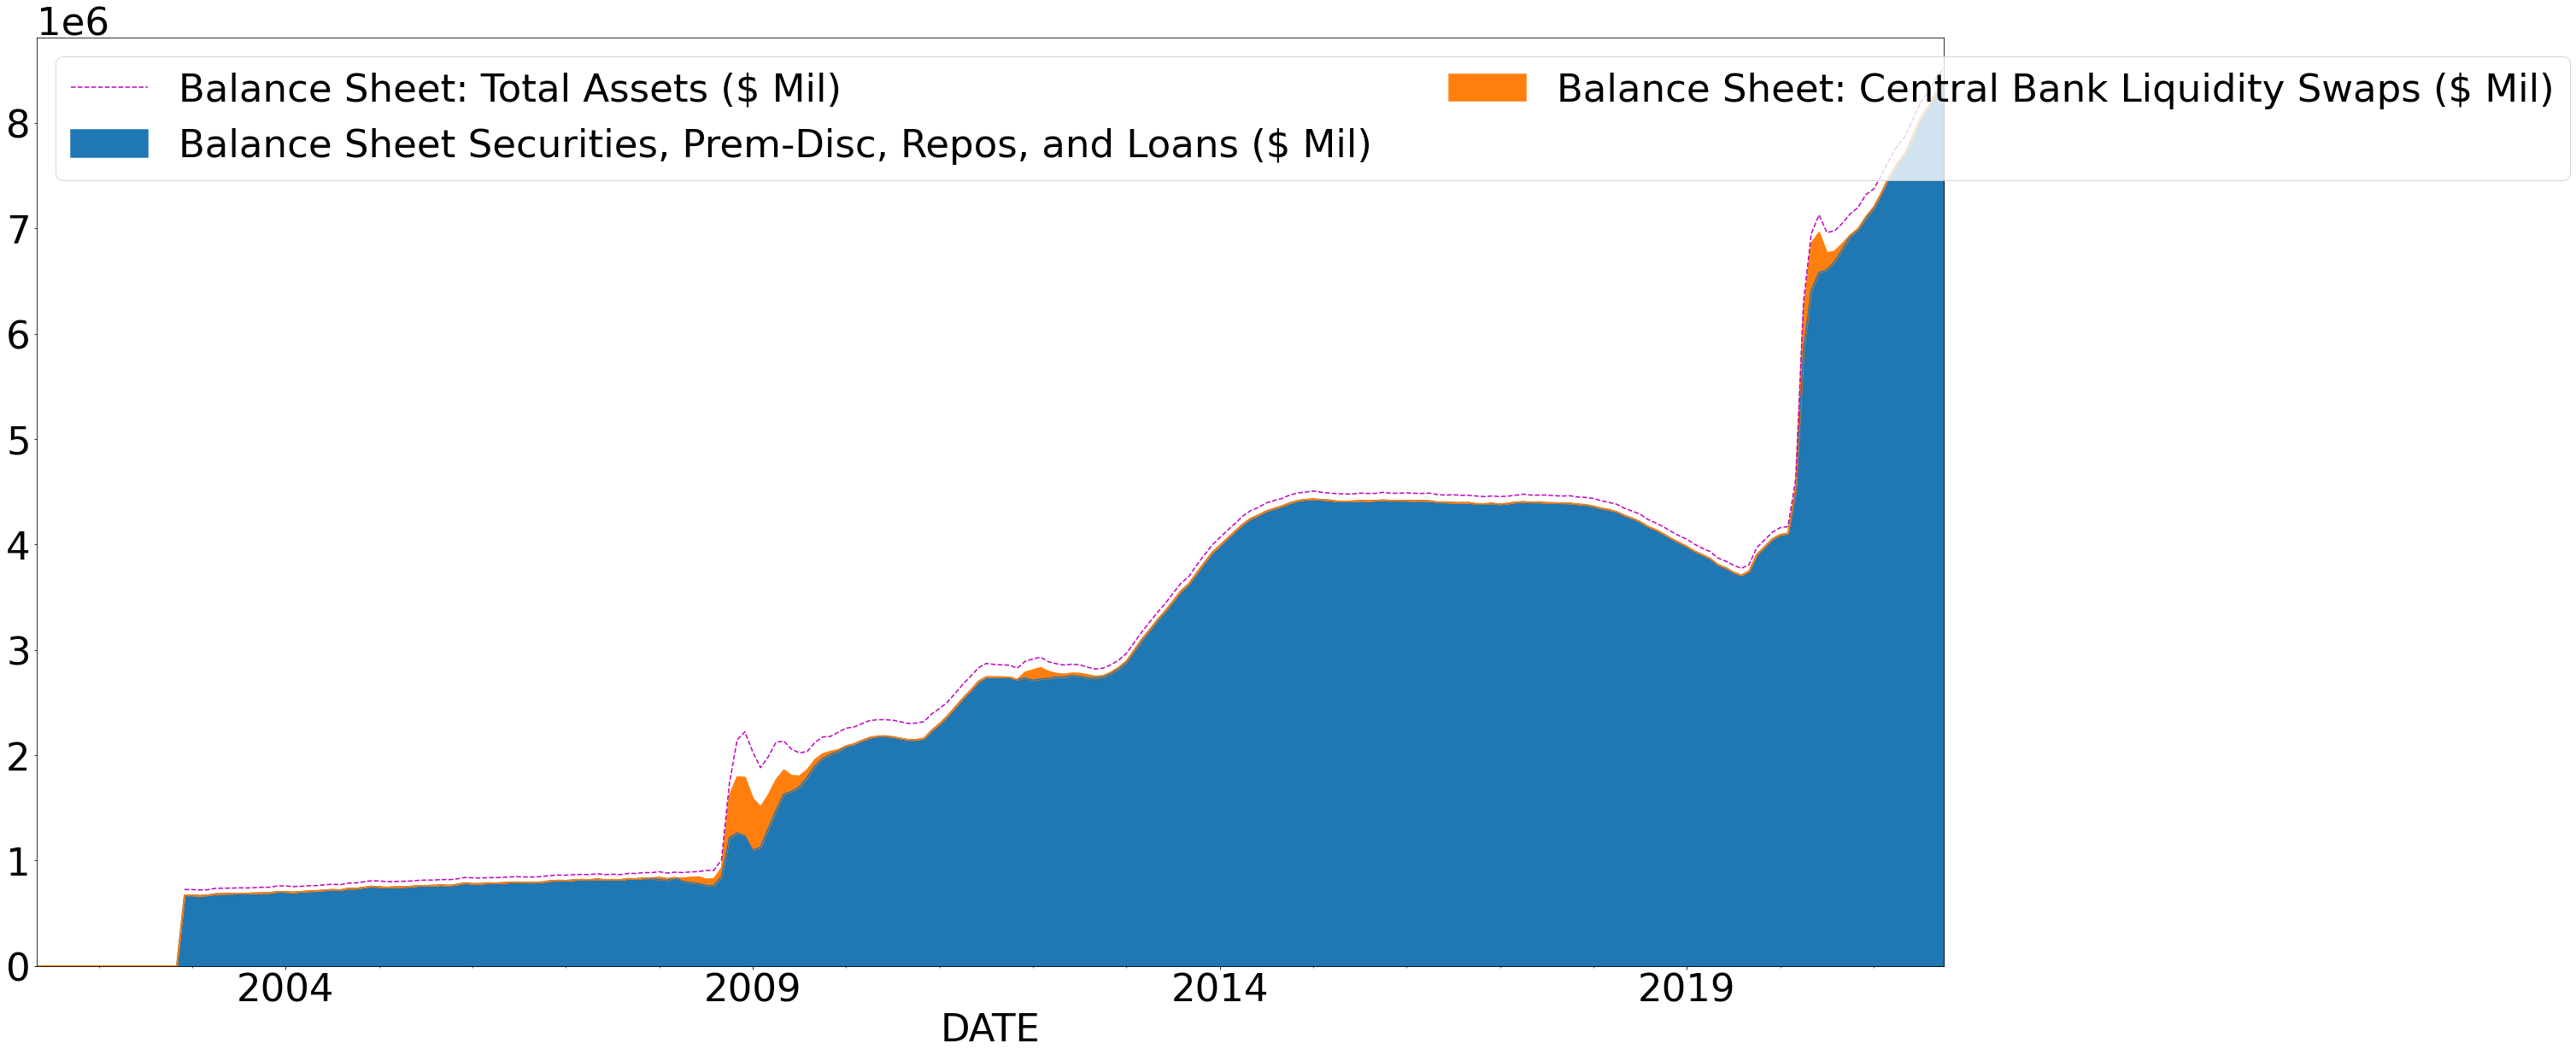

In [22]:
account_vars = ["Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",
                "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")


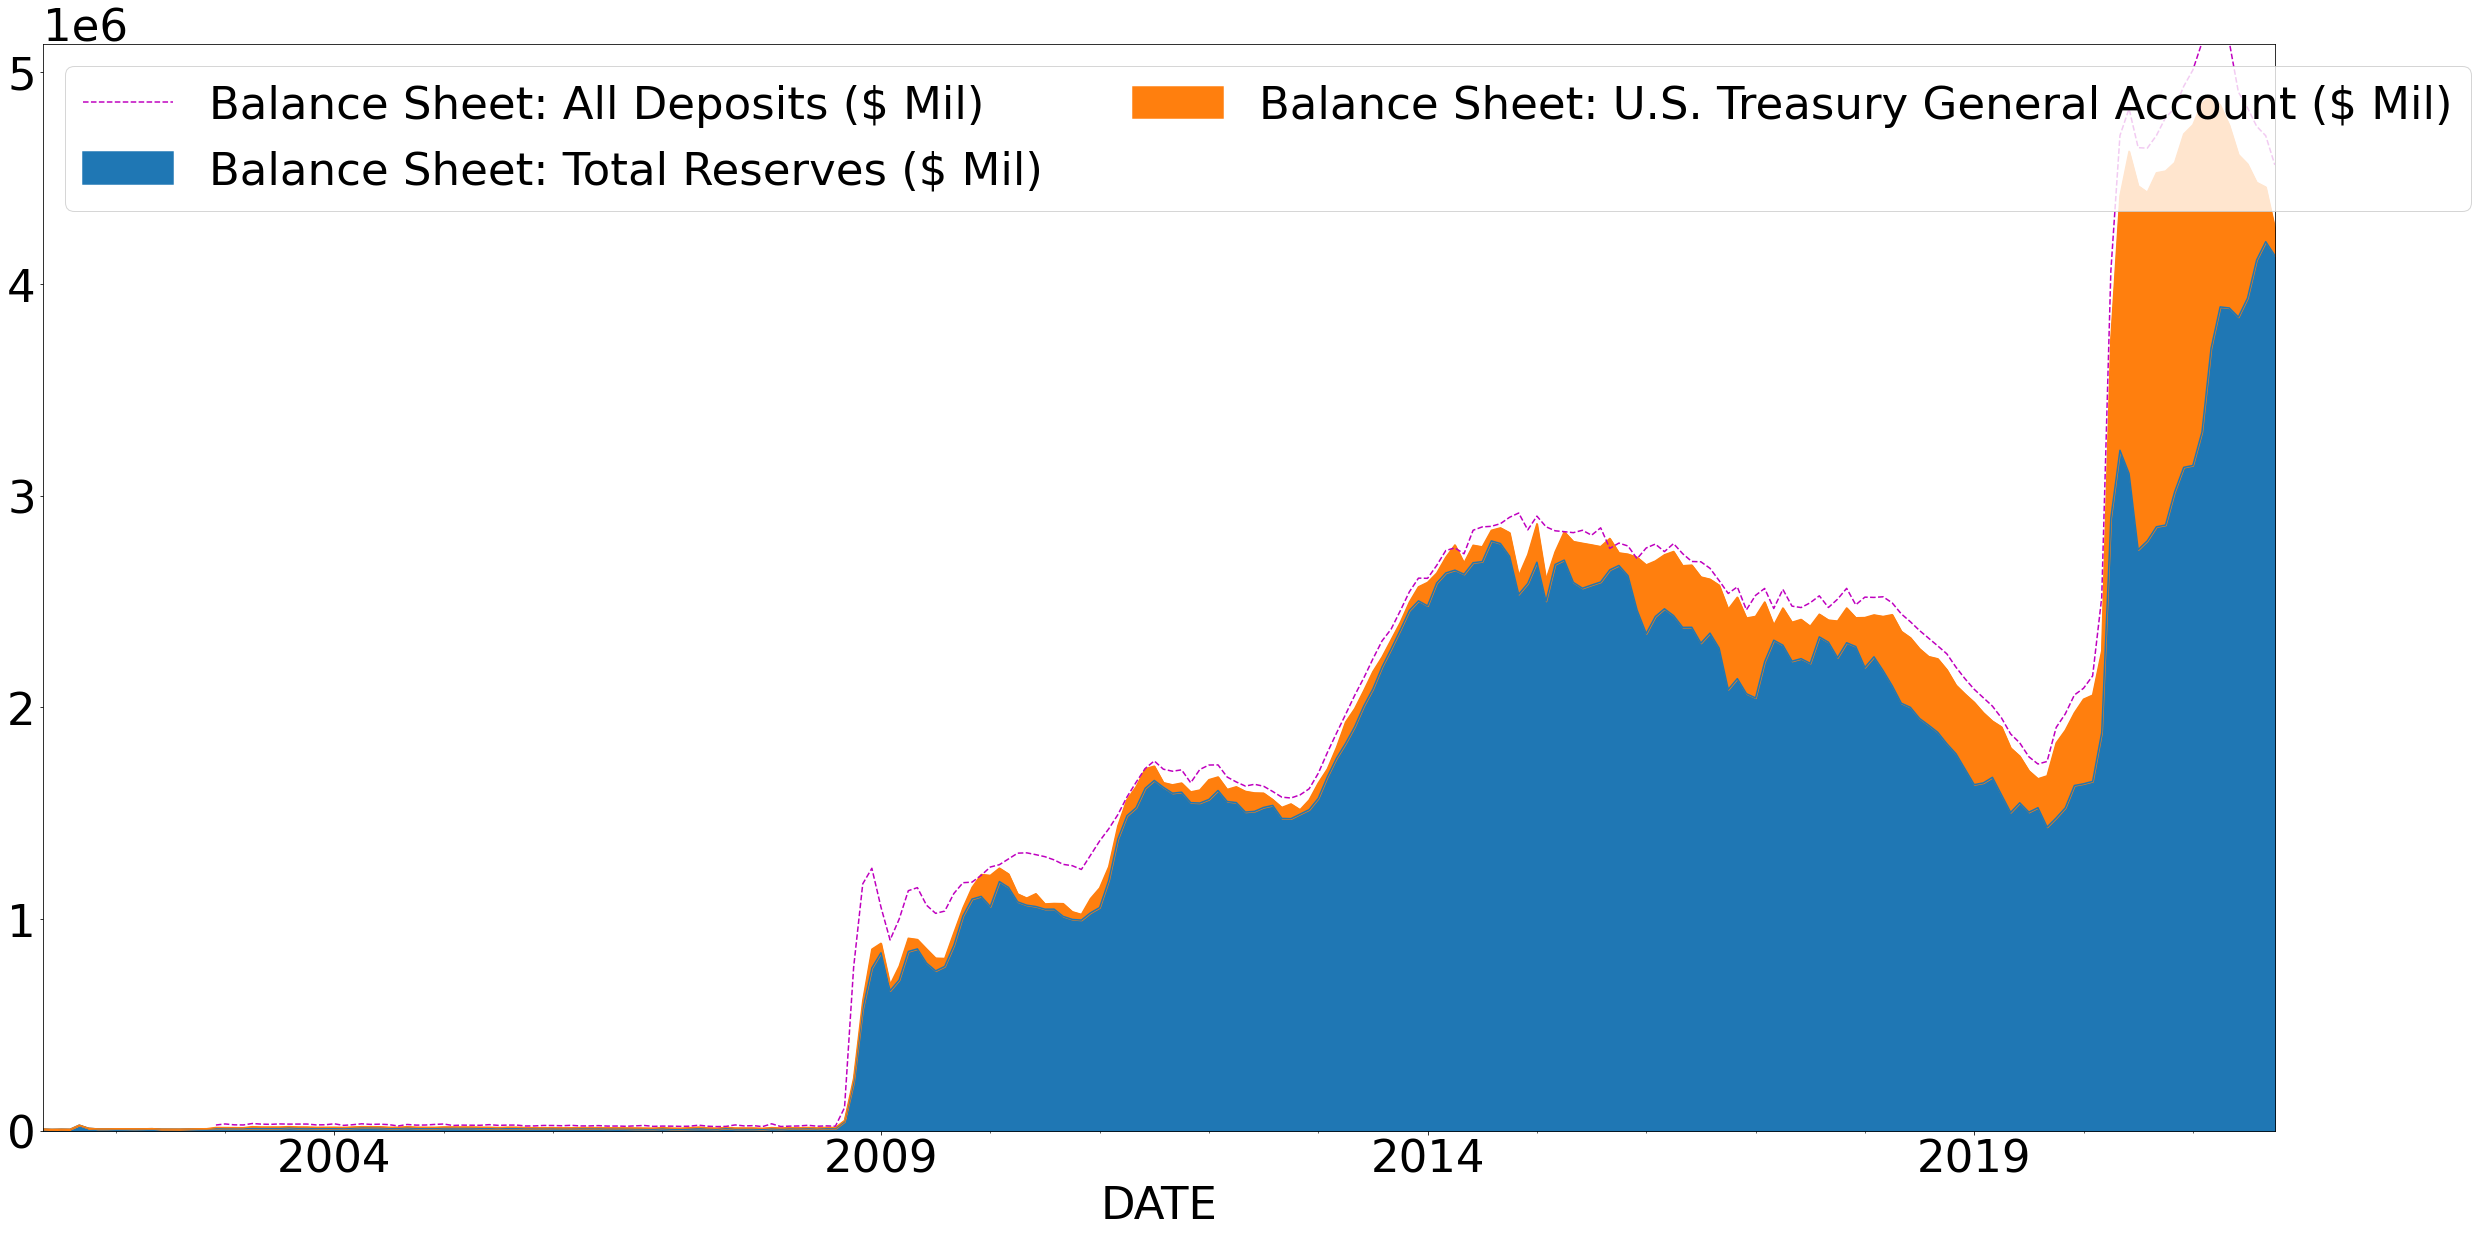

In [23]:
account_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: All Deposits ($ Mil)")

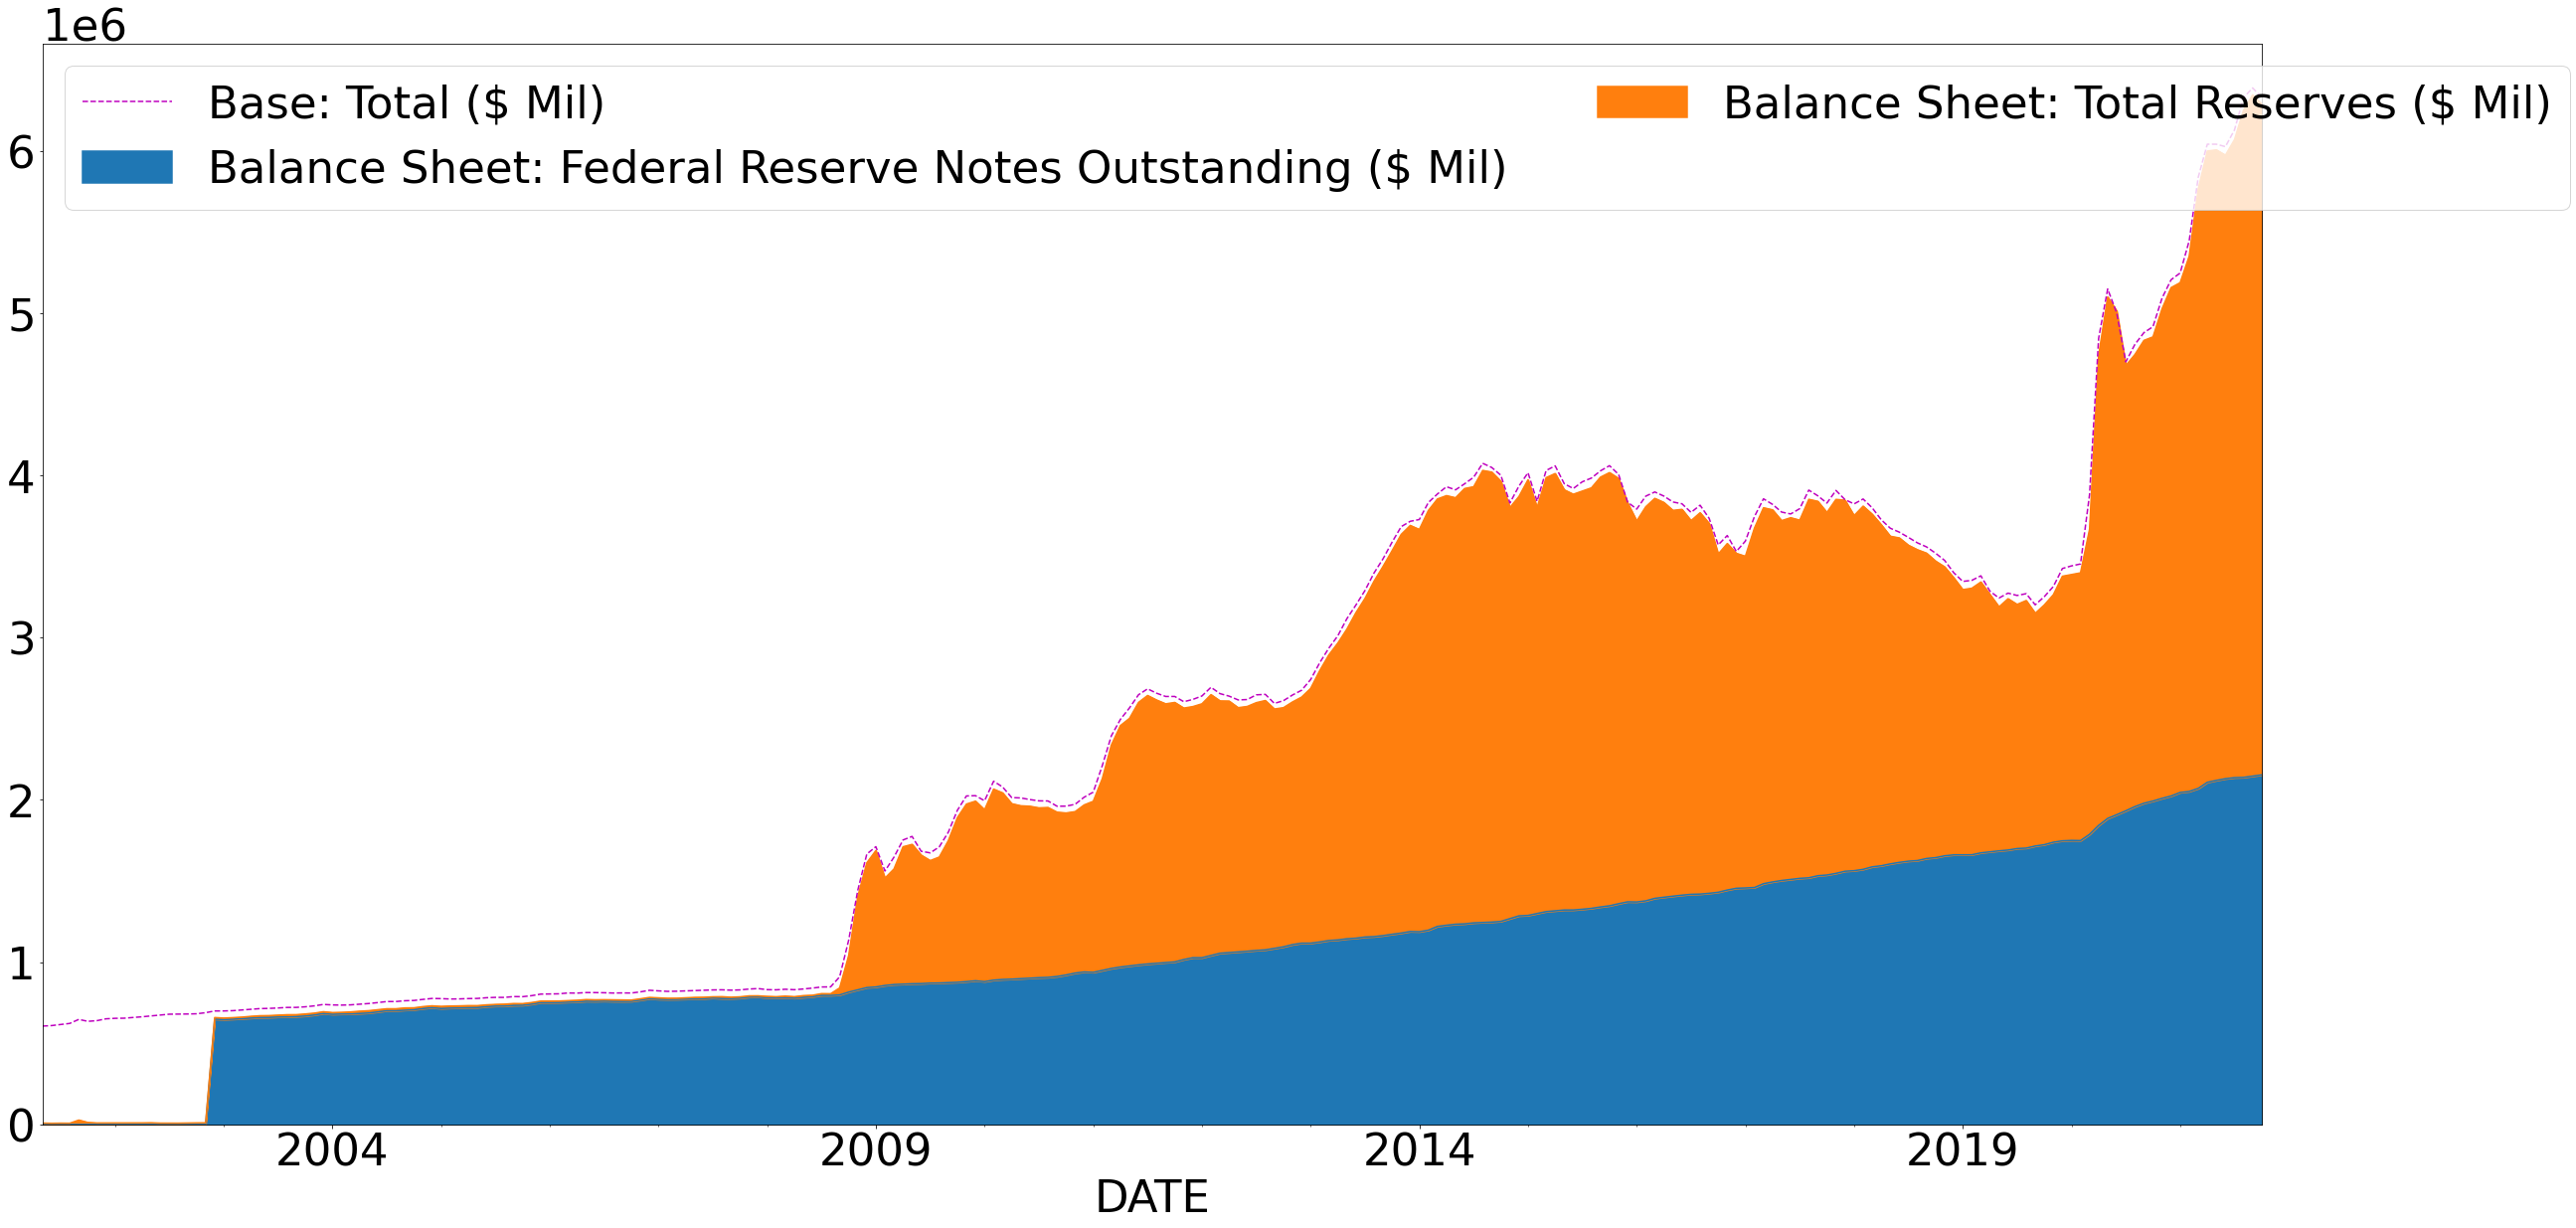

In [24]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Base: Total ($ Mil)")

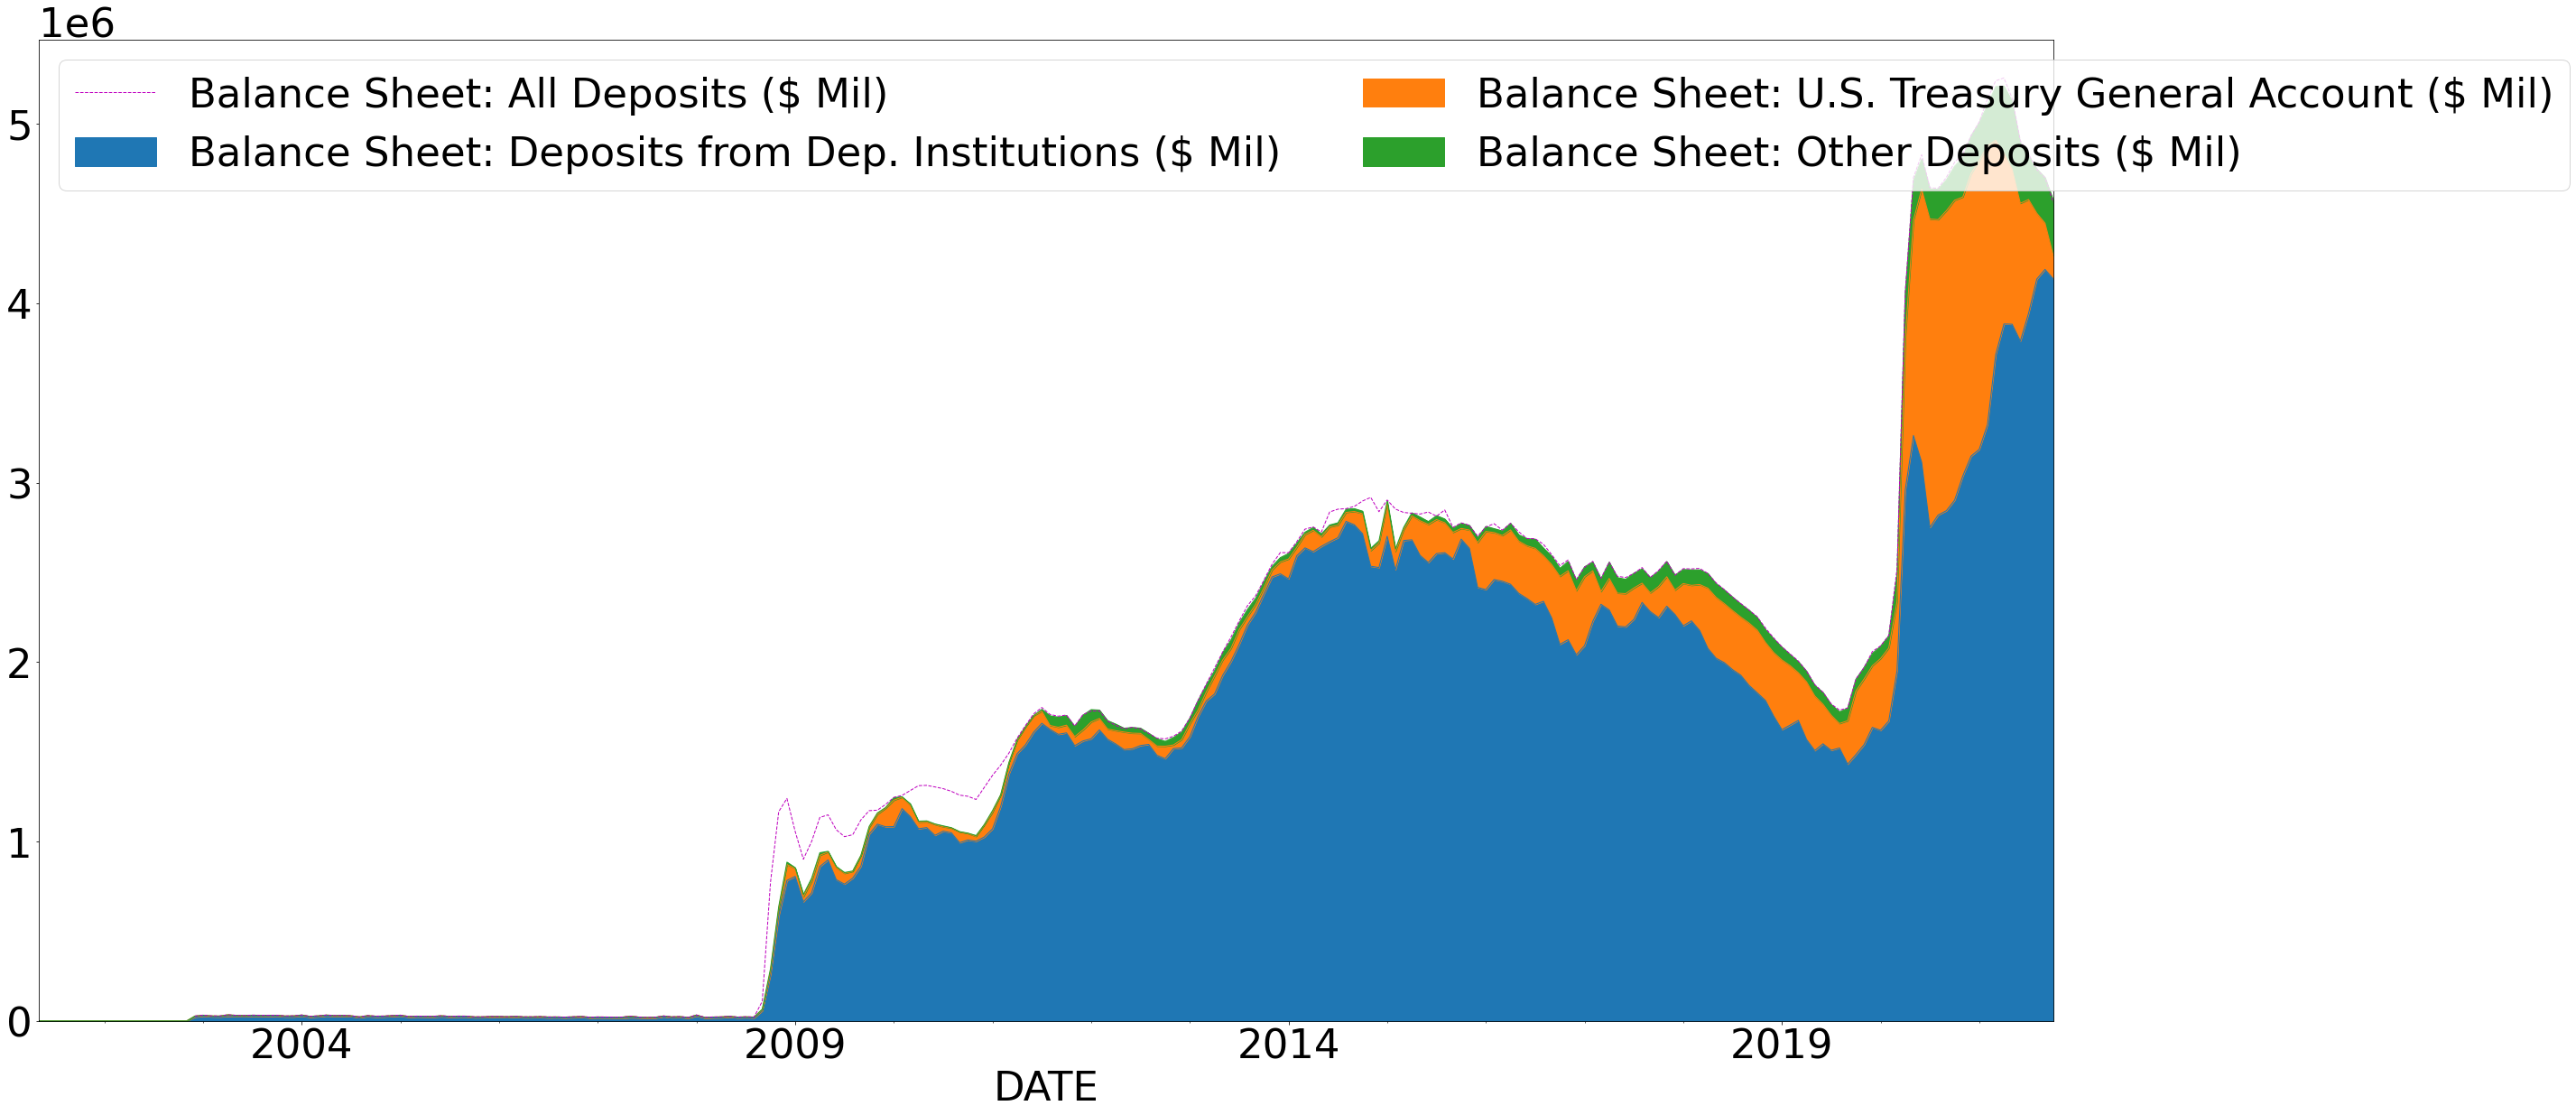

In [25]:
account_vars = ["Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1, total_var = "Balance Sheet: All Deposits ($ Mil)")

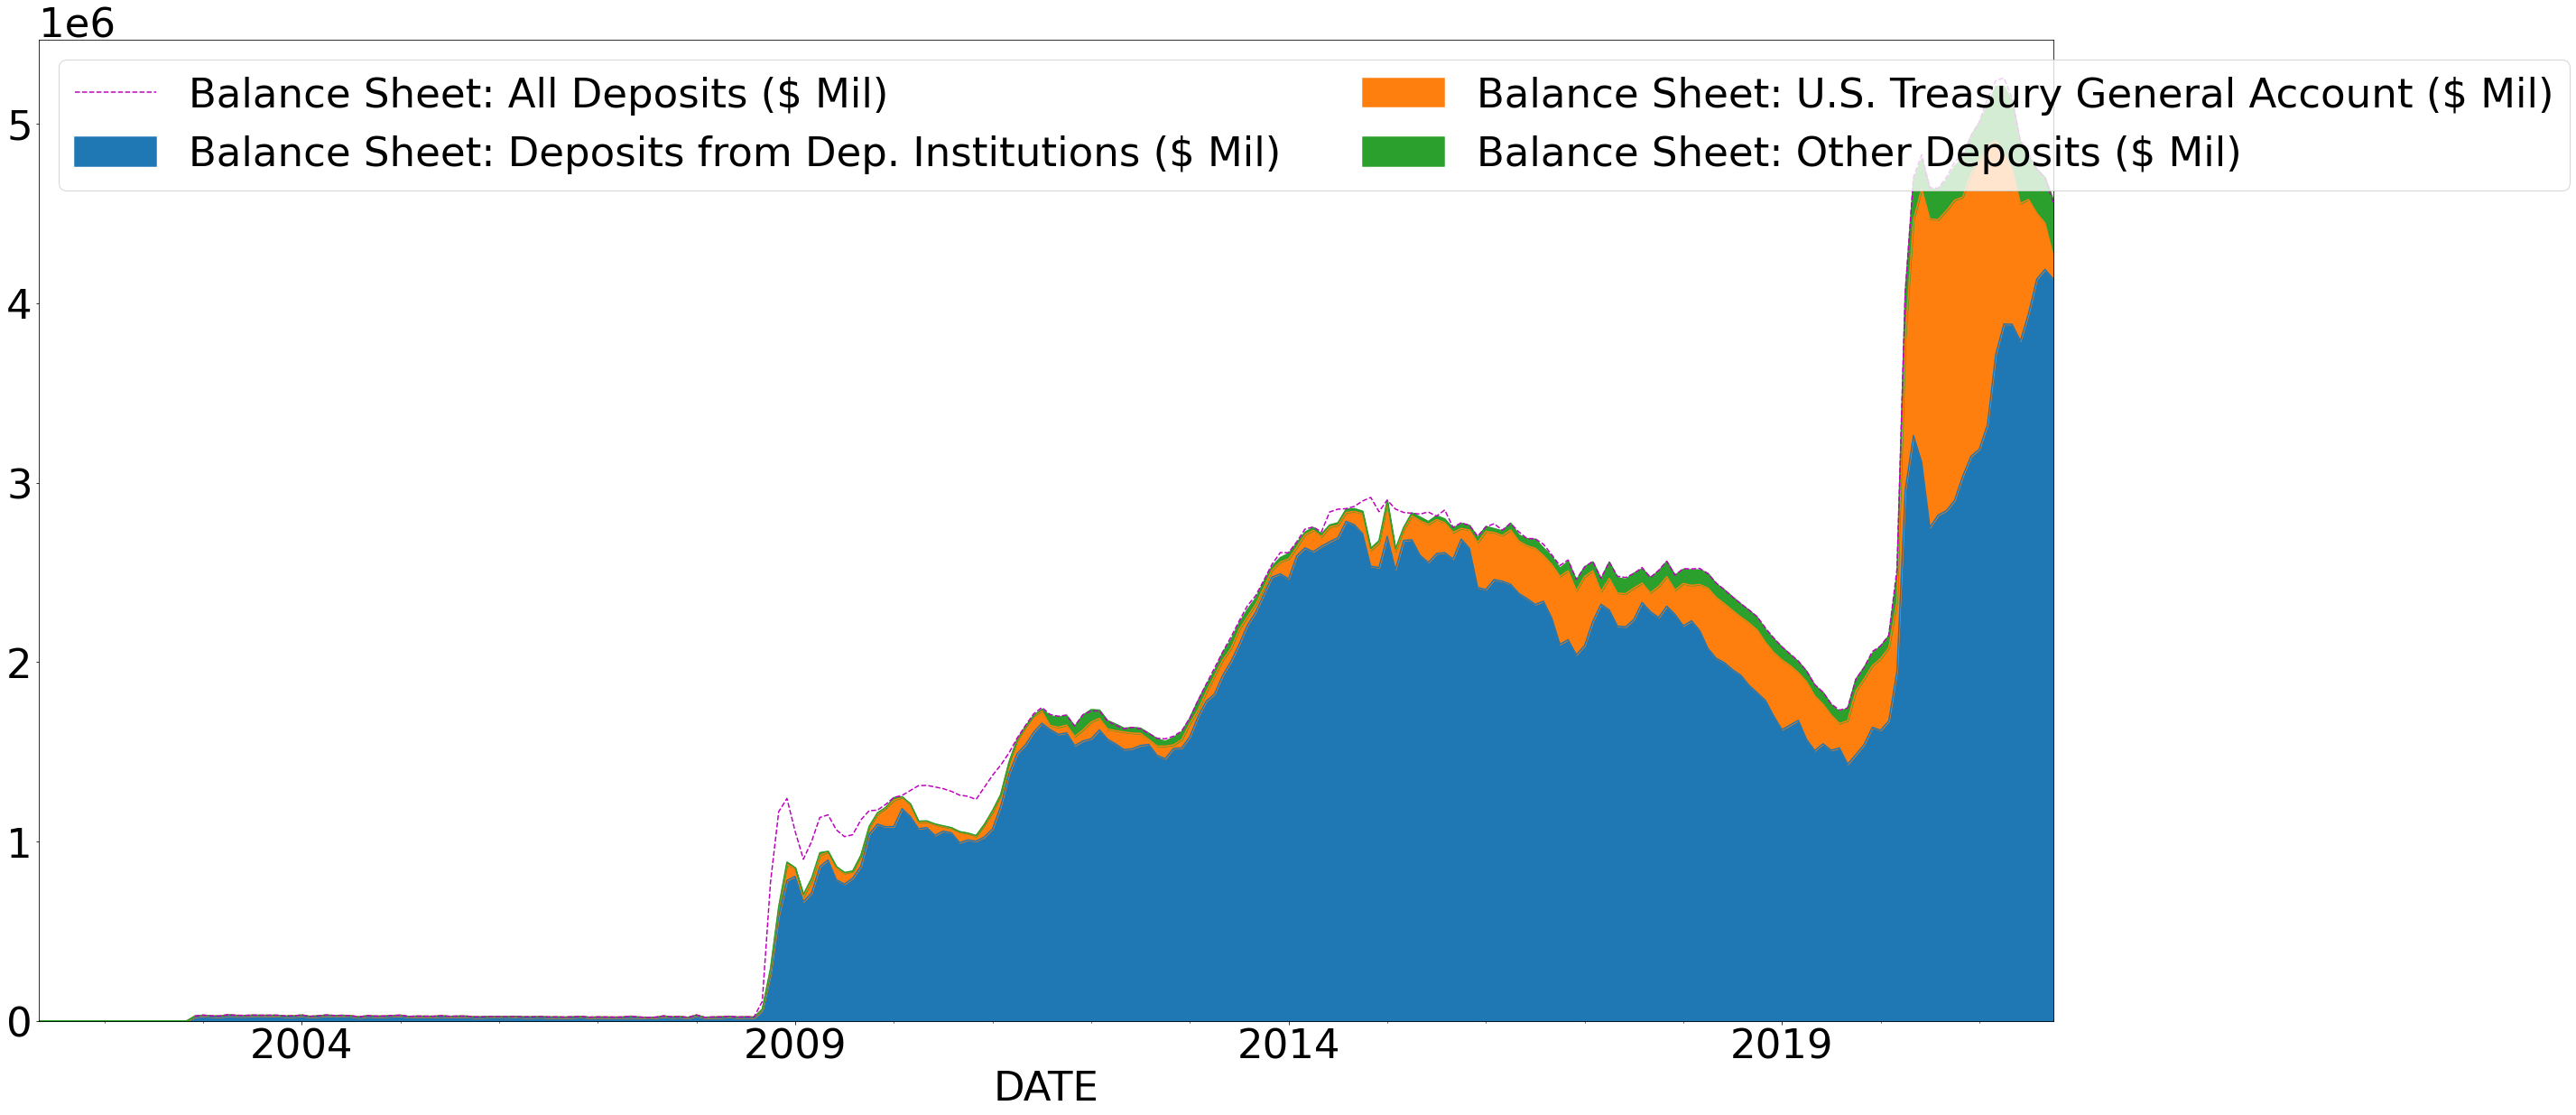

In [27]:
account_vars = ["Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: All Deposits ($ Mil)")

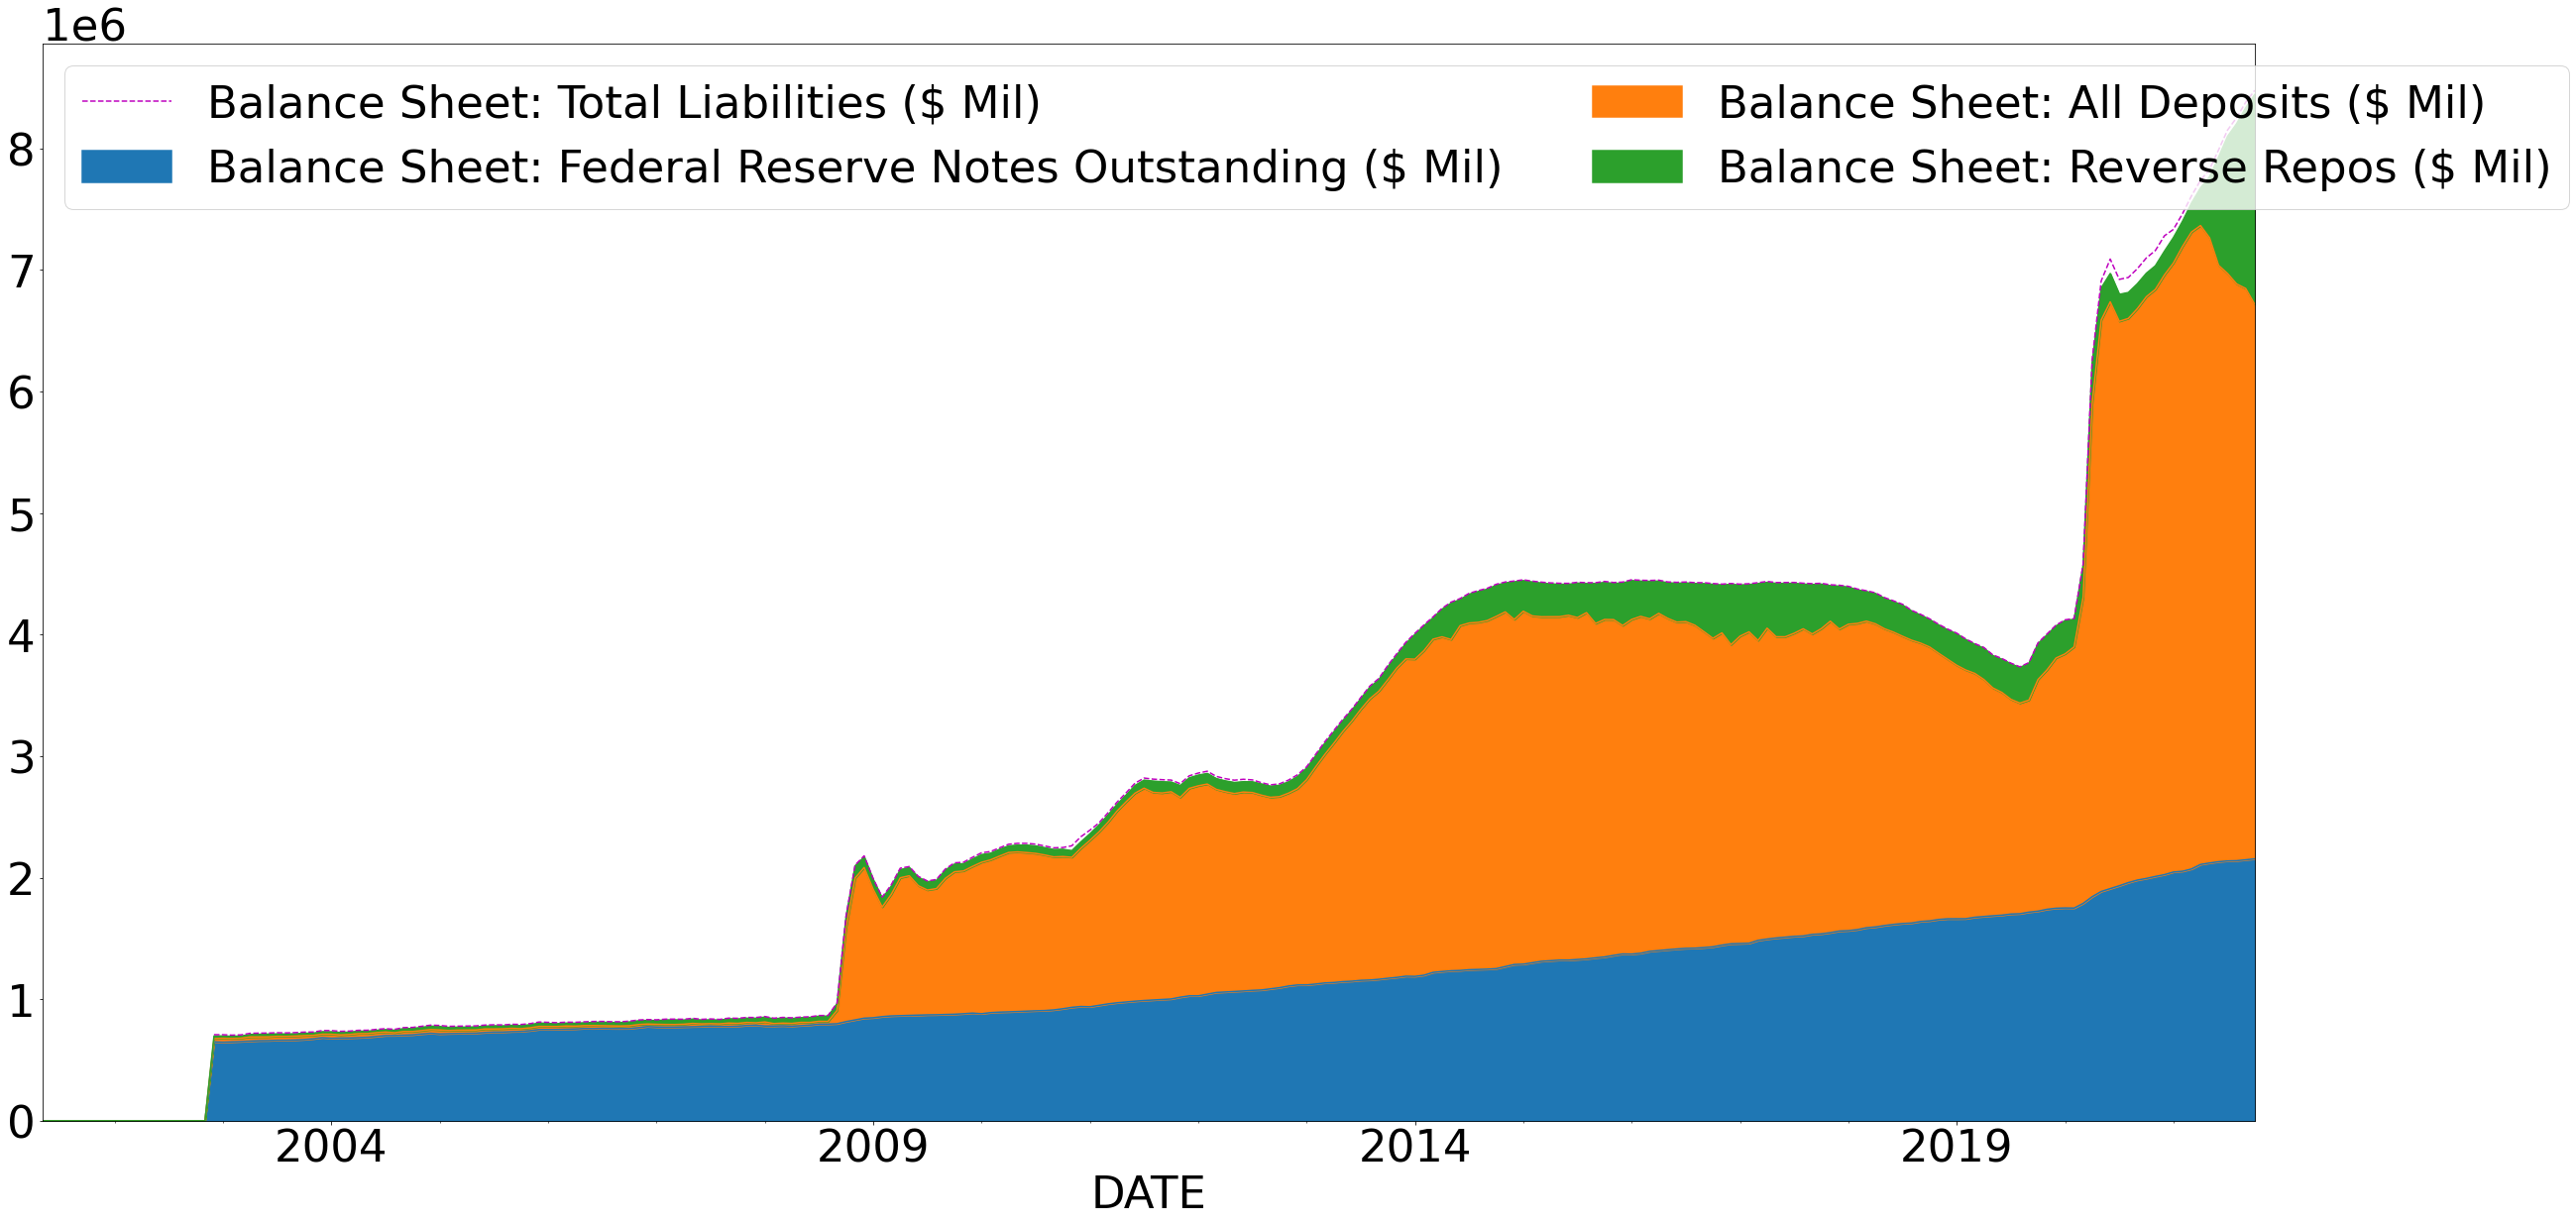

In [28]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Liabilities ($ Mil)")

<ipython-input-8-abc1d860338b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


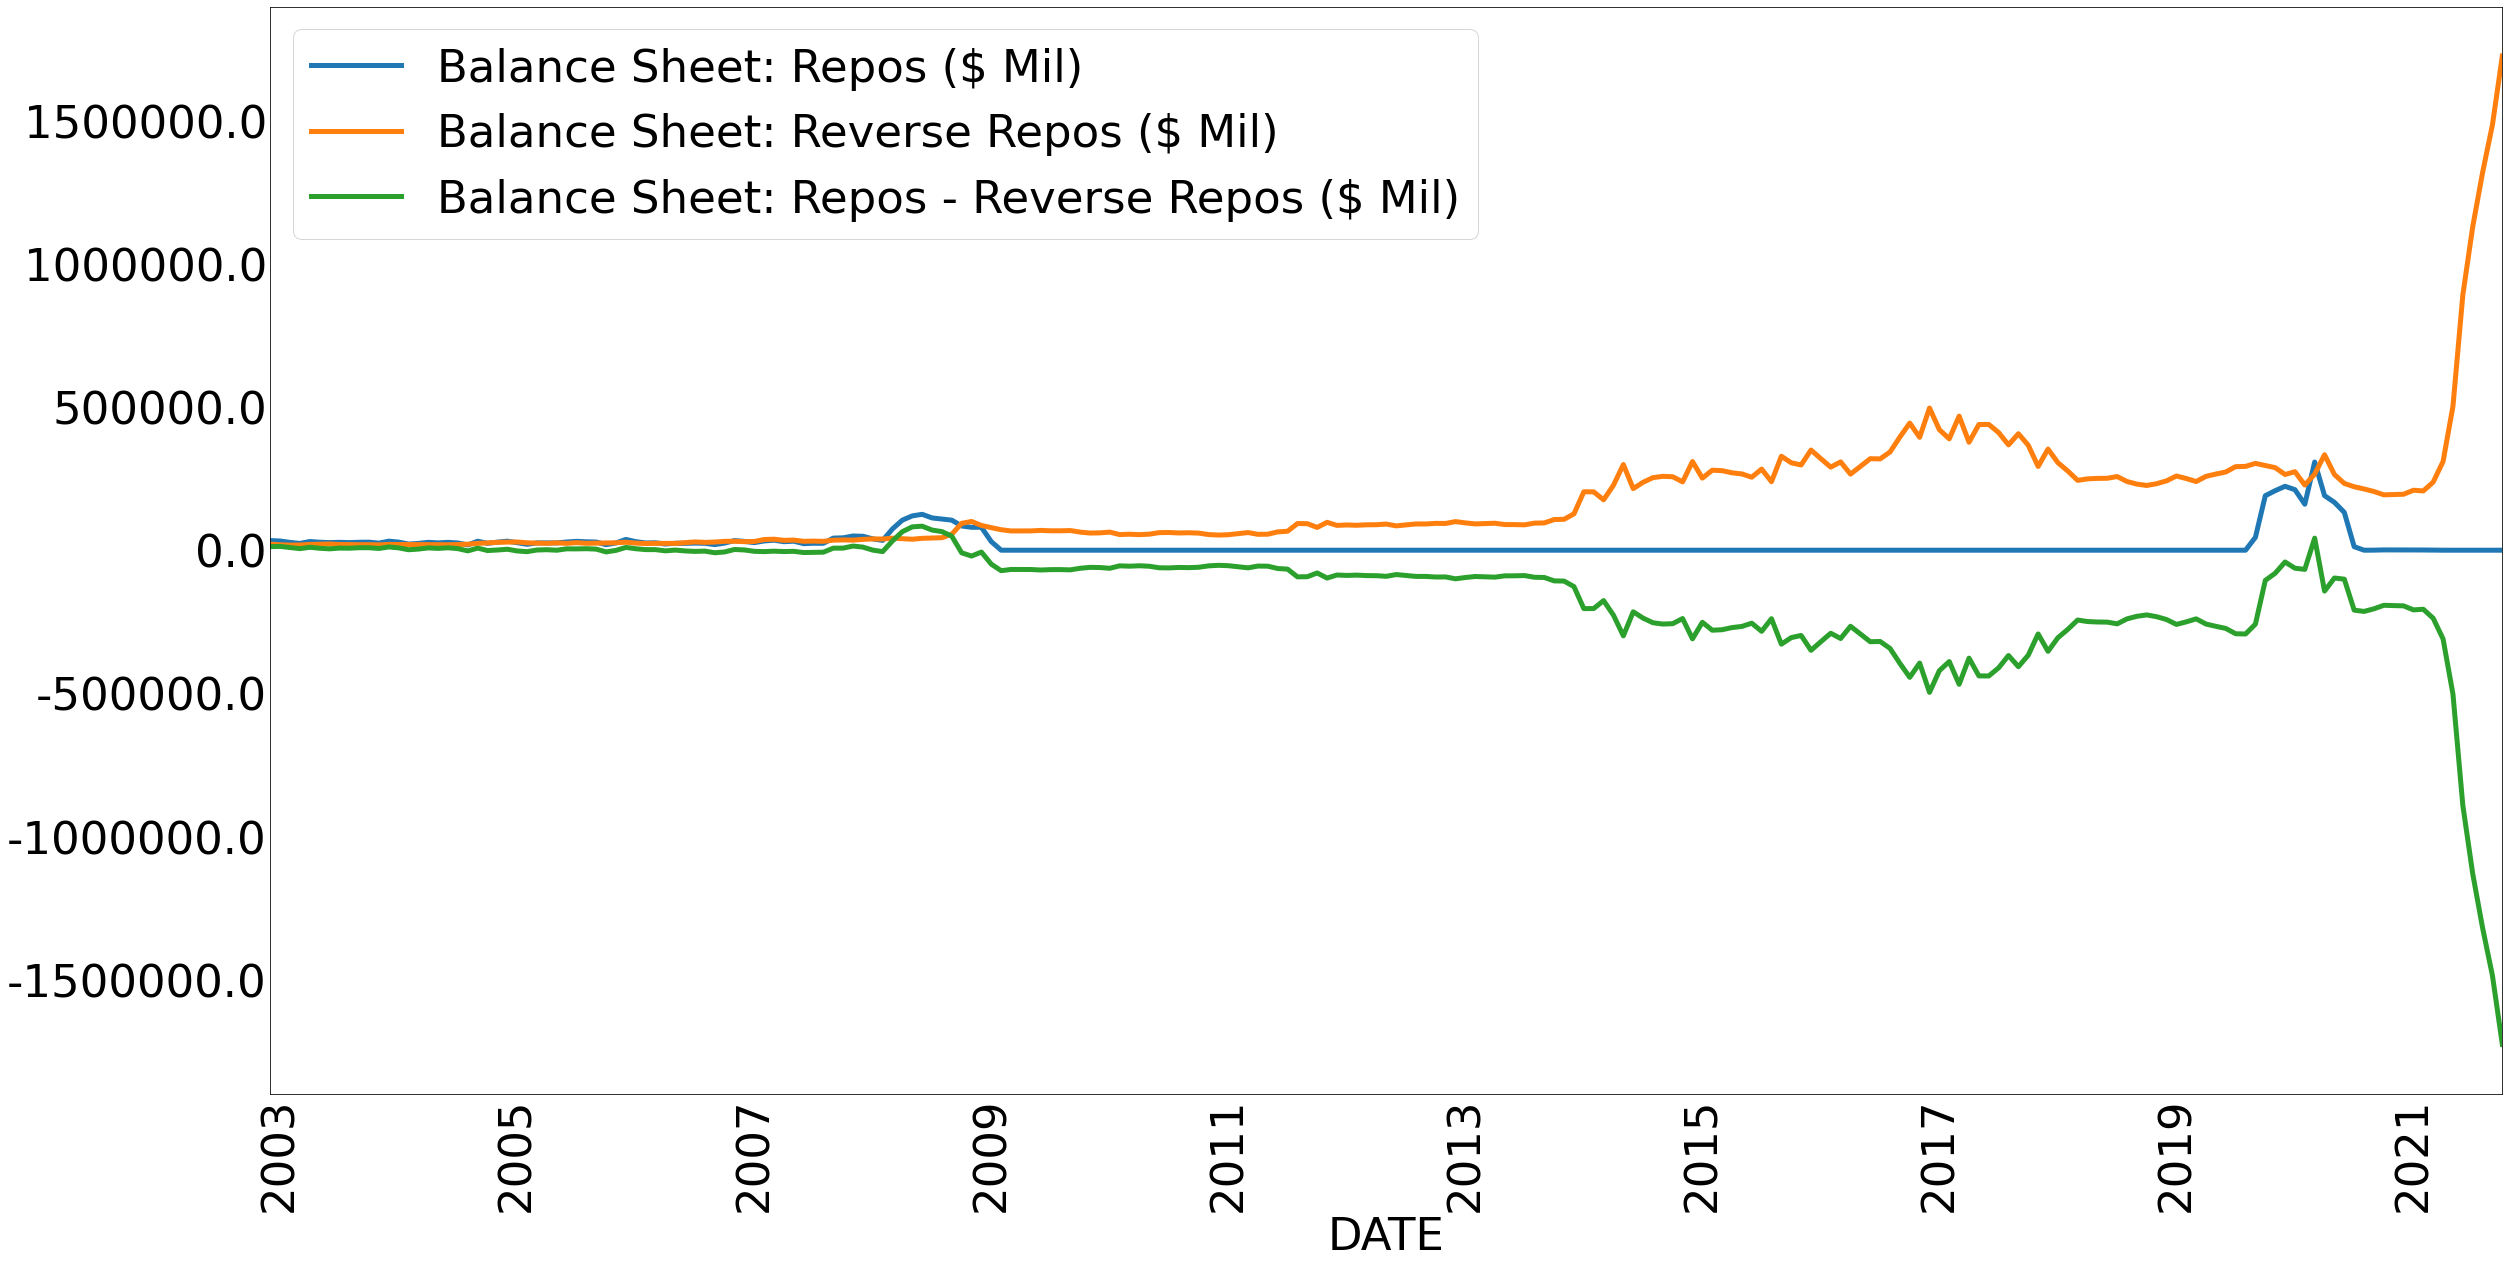

In [30]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
#the spikes near the begining of 2021 must be from the pandemic, but it looks like it starts just a little sooner
plot_lines(data[overnight_vars], linewidth = 5)
data[overnight_vars].to_csv("repoMarket.csv")

<ipython-input-8-abc1d860338b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


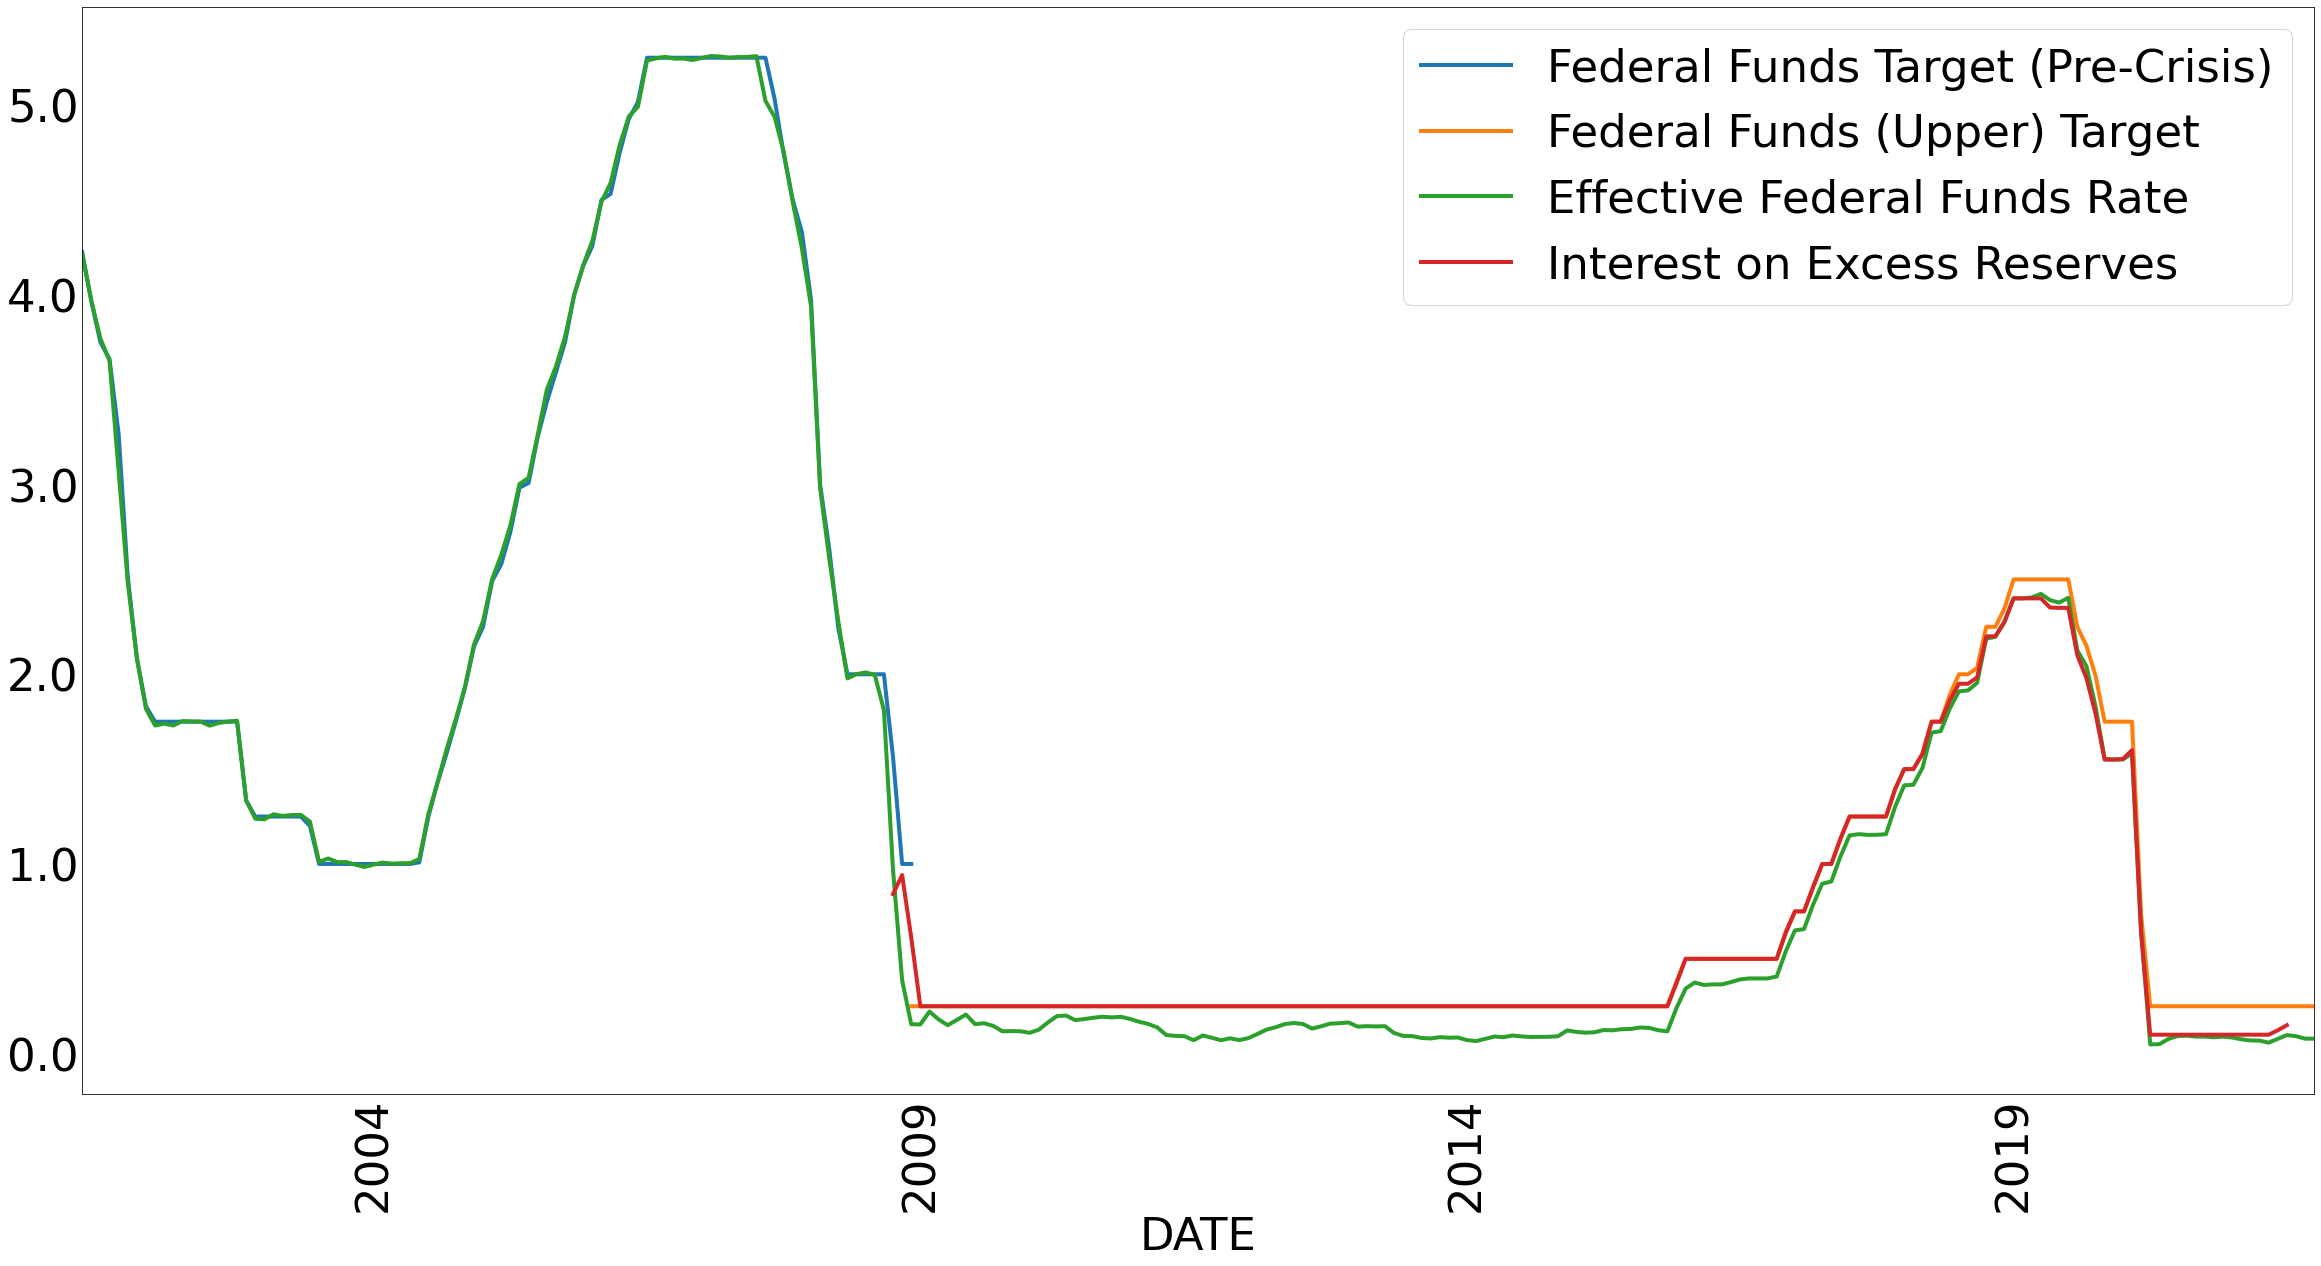

In [31]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]
plot_lines(data[interest_vars], linewidth = 4)        
#seems like the fed meets its target pretty well

<AxesSubplot:xlabel='DATE'>

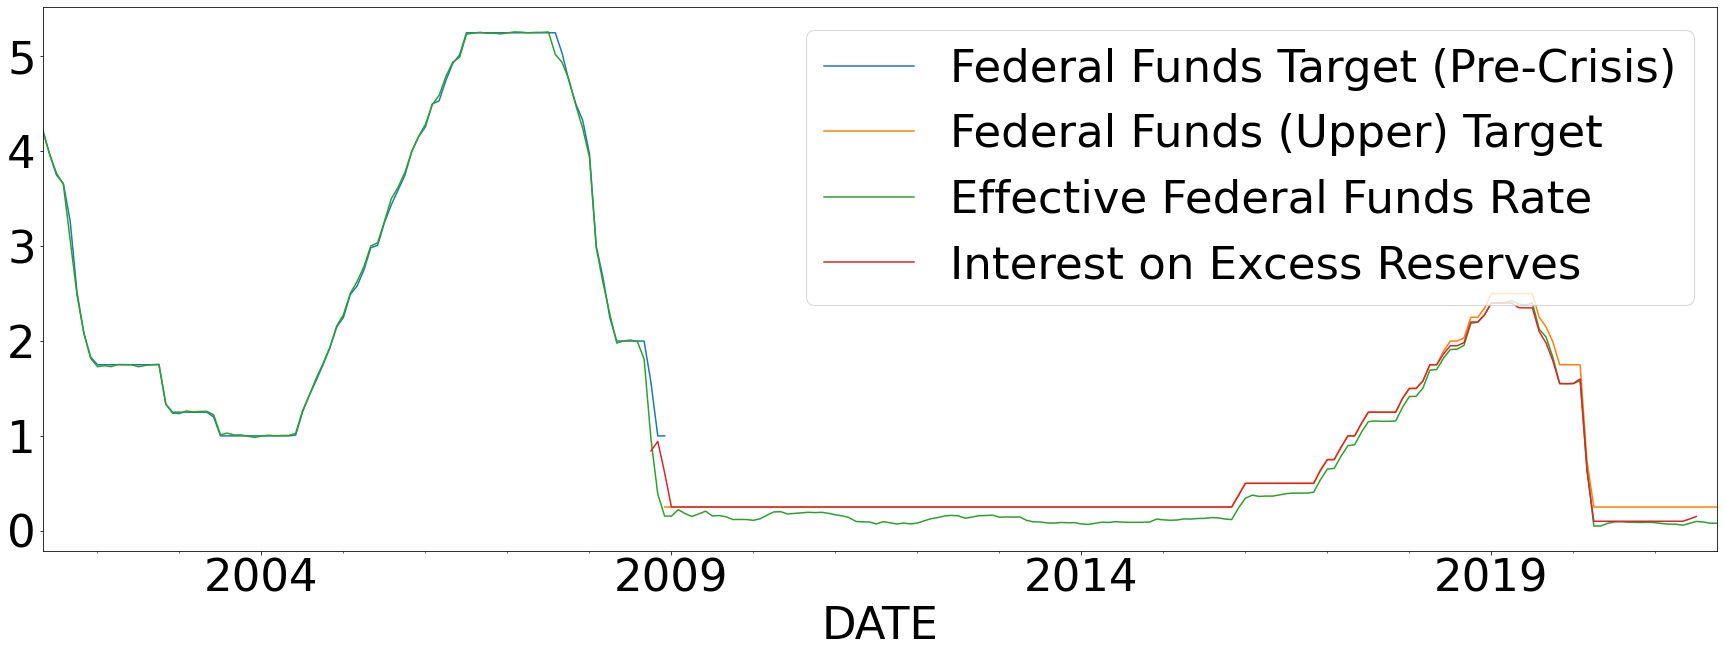

In [34]:
#made it longer so you could see it all withough having to scrole 
fig, ax = plt.subplots(figsize = (30,10))
data[interest_vars].plot(ax= ax)

In [1]:
data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"] =\
    data["Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"].add(
    data["Balance Sheet: Direct Lending ($ Mil)"])
data["Balance Sheet: Other Securities"] = data["Balance Sheet: Securities Held Outright ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Mortgage-Backed Securities ($ Mil)"])
data["Balance Sheet: Other"] = data["Balance Sheet: Total Assets ($ Mil)"].sub(
    data["Balance Sheet: Securities Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"]).sub(
    data["Balance Sheet: Repos ($ Mil)"]).sub(
    data["Balance Sheet: Unamortized Security Premiums ($ Mil)"])

account_vars = ["U.S. Treasuries Held Outright",
               "Mortgage-Backed Securities",
               "Other Securities",
               "Direct Lending and Central Bank Liquidity Swaps",
               "Repos",
               "Unamortized Security Premiums",
               "Other"]
plot_data = data.rename(columns = {
    key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()})
for key, val in plot_data.items():
        plot_data[key] = val.div(10**6)

figsize= (36,18)
fig, ax = plt.subplots(figsize = figsize)
plot_data[account_vars].plot.area(stacked = True, linewidth = 3,
                            ax = ax)
# sets the numbers in trillions 
total_var = "Total Assets"
plot_data[total_var].plot.line(linewidth = 3, 
                             ax = ax, c = "k",
                             label = total_var, ls = "--")
plt.xticks(rotation = 90)
ax.legend(loc=2, ncol = 2)
ax.set_ylabel("$ Trillion", fontsize = 40)
ax.set_title("Federal Reserve Balance Sheet: Assets", fontsize = 50)

NameError: name 'data' is not defined

In [2]:
data["Balance Sheet: Other Deposits ($ Mil)"] = data["Balance Sheet: All Deposits ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"])
data["Balance Sheet: Other"]= data["Balance Sheet: Total Liabilities ($ Mil)"].sub(
    data["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)"]).sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"]).sub(
    data["Balance Sheet: Other Deposits ($ Mil)"]).sub(
    data["Balance Sheet: Reverse Repos ($ Mil)"])

account_vars = ["Federal Reserve Notes Outstanding",
                "U.S. Treasury General Account",
                "Deposits from Dep. Institutions",
                "Other Deposits",
                "Reverse Repos",
                "Other"]

plot_data = data.rename(columns = {
    key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()})
for key, val in plot_data.items():
        plot_data[key] = val.div(10**6)
plot_stacked_lines(
    plot_data,
    account_vars, linewidth = 1.5,
    total_var = "Total Liabilities")

figsize= (36,18)
fig, ax = plt.subplots(figsize = figsize)
plot_data[account_vars].plot.area(stacked = True, linewidth = 3,
                            ax = ax)
# change y vals from mil to tril
total_var = "Total Liabilities"
plot_data[total_var].plot.line(linewidth = 3, 
                             ax = ax, c = "k",
                             label = total_var, ls = "--")
plt.xticks(rotation = 90)
ax.legend(loc=2, ncol = 2)
ax.set_ylabel("$ Trillion", fontsize = 40)
ax.set_title("Federal Reserve Balance Sheet: Liabilities", fontsize = 50)

NameError: name 'data' is not defined